<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🚗 Accident Risk ⚠️
    </h1>
</div>


# Overview

**Background**

This dataset contains **simulated records of road environments and accident risks**, with more than **500,000 entries**.
It includes **road infrastructure, environmental, and temporal factors** such as road type, number of lanes, curvature, speed limits, lighting conditions, weather, time of day, holiday periods, and school seasons.

The dataset provides both **reported accidents** and a **risk score (`accident_risk`)**, which makes it valuable for **predictive modeling of accident likelihood** under different conditions.

**Goal of the Project**

The primary objective is to **predict accident risk (0–1)** using machine learning models.
This supports:

* **Traffic safety planning** – identifying high-risk conditions
* **Urban development** – improving road design and infrastructure
* **Policy making** – shaping speed limits and safety regulations
* **Public awareness** – enabling safer driving behavior through insights

**Key Features**

| Feature Name             | Description                                                               |
| ------------------------ | ------------------------------------------------------------------------- |
| `id`                     | Unique identifier for each record                                         |
| `road_type`              | Type of road (urban, rural, highway, etc.)                                |
| `num_lanes`              | Number of lanes on the road                                               |
| `curvature`              | Road curvature (higher = sharper turn)                                    |
| `speed_limit`            | Posted speed limit                                                        |
| `lighting`               | Lighting condition (daylight, dim, night, etc.)                           |
| `weather`                | Weather condition (clear, rainy, foggy, etc.)                             |
| `road_signs_present`     | Presence of road signs (True/False)                                       |
| `public_road`            | Whether the road is public or private                                     |
| `time_of_day`            | Morning / Afternoon / Evening / Night                                     |
| `holiday`                | Whether the record occurred on a holiday                                  |
| `school_season`          | Whether it was during the school season                                   |
| `num_reported_accidents` | Number of accidents observed in similar conditions                        |
| `accident_risk`          | Risk score (0–1) estimating likelihood of accidents (**target variable**) |

**Files Provided**

* `train.csv`: Dataset with road attributes, accident records, and risk scores.
* `test.csv`: Test dataset (without the target variable).
* `sample_submission.csv`: Template for submitting predictions.

**Project Objective**

The notebook aims to **model and predict accident risk (continuous score)**, helping to:

* Quantify risk levels under varying conditions
* Identify **key drivers** of higher accident risks (weather, road type, time, etc.)
* Provide insights for **safety interventions** and **urban planning**

**Key Steps**

* **Exploratory Data Analysis (EDA):**
  Study distributions of accident risk across road, weather, and temporal factors.

* **Feature Engineering:**
  Encode categorical features, normalize continuous features, and create interaction variables (e.g., *curvature × speed*).

* **Modeling:**
  Train and compare regression models:

  * Linear Regression / Ridge / Lasso
  * Random Forest Regressor
  * Gradient Boosting (XGBoost, LightGBM)
  * Neural Networks (optional)

* **Evaluation Framework:**
  Evaluate models with:

  * **RMSE (Root Mean Squared Error)**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [1]:
!pip install scikit_posthocs > pip_log_scikit_posthocs.txt 2>&1

In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine learning
from sklearn.linear_model import Ridge, Lasso
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# Optuna
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
import scikit_posthocs as sp
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [3]:
# Load the datasets
df_train = pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
df_test = pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (517754, 14)

Test Data Shape: (172585, 13)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [4]:
# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   
3   3   highway          4       0.07           35       dim   rainy   
4   4     rural          1       0.58           60  daylight   foggy   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   
3                True         True     morning    False          False   
4               False        False     evening     True          False   

   num_reported_accidents  accident_risk  
0                       1           0.13  
1                       0           0.35  
2                       2           0.30  
3                       1           0.21  
4                       1           0.56


Test Data Preview:


id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0  517754   highway          2       0.34           45     night   clear   
1  517755     urban          3       0.04           45       dim   foggy   
2  517756     urban          2       0.59           35       dim   clear   
3  517757     rural          4       0.95           35  daylight   rainy   
4  517758   highway          2       0.86           35  daylight   clear   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0                True         True   afternoon     True           True   
1                True        False   afternoon     True          False   
2                True        False   afternoon     True           True   
3               False        False   afternoon    False          False   
4                True        False     evening    False           True   

   num_reported_accidents  
0                       1  
1                       0  
2                       1  
3                       2  
4                       3

In [5]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: 

## Insights from Initial Data Exploration

**Dataset Size and Structure**

* The **training dataset** contains **517,754 samples** with **14 columns**, including the target variable `accident_risk`.
* The **test dataset** includes **172,585 samples** with **13 columns** (same structure as train but without the target), ready for prediction.

**Feature Overview**

* Both datasets capture key **road, environmental, and temporal attributes**:

  * **Numerical features:** `curvature`.
  * **Categorical features (including binary/boolean):**

    * `speed_limit`, `num_reported_accidents`, `num_lanes`, `road_type`, `lighting`, `weather`, `time_of_day`
    * `road_signs_present`, `public_road`, `holiday`, `school_season`
  * **Target variable:** `accident_risk` (continuous value between 0–1, representing accident likelihood).

**Data Consistency and Completeness**

* The datasets have **no missing values**, which simplifies preprocessing and modeling.
* Data types are consistent: numerical features are stored as `int64` or `float64`, while categorical features (including booleans) are either `object` or `bool`.
* The column `id` is only an identifier and should be excluded from the modeling process.

**Differences Between Datasets**

* The **train set** includes the target variable `accident_risk`, while the **test set** does not.
* Aside from this, both datasets share the same structure for input features, ensuring alignment between training and prediction phases.

In [6]:
# Drop column id
df_train.drop(columns="id", axis=1, inplace=True)
list_test_id = df_test["id"].copy().to_list()
df_test.drop("id", axis=1, inplace=True)

num_features = ["curvature"]
cat_features = ["num_lanes", "speed_limit", "num_reported_accidents", "road_type", "lighting", "weather",
                "time_of_day", "road_signs_present", "public_road", "holiday", "school_season"]

print("Train Data describe:")
cm = sns.light_palette("red", as_cmap=True)
display(df_train[num_features].describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test[num_features].describe().T.style.background_gradient(cmap=cm))

Train Data describe:



Test Data describe:


## Descriptive Insights from Dataset Statistics

* **Value Distribution:**

  * Ranges from **0.0 → 1.0** (normalized scale).
  * Median (`50%`) = **0.51**, meaning most roads have a **moderate level of curvature** (not completely straight, but not extremely sharp either).
  * Q1 = **0.26** → a significant portion of roads are relatively straight.
  * Q3 = **0.71** → some roads are highly curved, which can increase accident risk.

* **Train vs Test Comparison:**

  * Very similar distributions (mean ≈ 0.489 vs 0.487, std ≈ 0.273).
  * This indicates that the test set comes from a distribution consistent with the training set → no sign of **data shift**.

* **Relevance for Modeling:**

  * This is a **true numerical feature** (unlike `num_lanes`, `speed_limit`, or `num_reported_accidents` which are more categorical in nature).
  * It should be kept as a **continuous variable**, allowing regression or boosting models to capture its variations effectively.

👉 **Summary:**

* `curvature` reflects the **straightness or bend of a road**.
* Most roads are moderately curved, but there is still a mix of very straight and sharply curved roads.
* This is likely an **important predictive feature**, since sharp curves generally increase accident risk.

In [7]:
def convert_cat(features, df):
    for feature in features:
        if feature in df.columns:
            df[feature] = df[feature].astype("category")

convert_cat(features=cat_features, df=df_train)
convert_cat(features=cat_features, df=df_test)

# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   road_type               517754 non-null  category
 1   num_lanes               517754 non-null  category
 2   curvature               517754 non-null  float64 
 3   speed_limit             517754 non-null  category
 4   lighting                517754 non-null  category
 5   weather                 517754 non-null  category
 6   road_signs_present      517754 non-null  category
 7   public_road             517754 non-null  category
 8   time_of_day             517754 non-null  category
 9   holiday                 517754 non-null  category
 10  school_season           517754 non-null  category
 11  num_reported_accidents  517754 non-null  category
 12  accident_risk           517754 non-null  float64 
dtypes: category(11), float64(2)
memory usage: 

In [8]:
print("Train Data describe:")
display(df_train[cat_features].describe().T.style.background_gradient(cmap="Blues", subset=["unique", "freq"]))

print("\nTest Data describe:")
display(df_test[cat_features].describe().T.style.background_gradient(cmap="Blues", subset=["unique", "freq"]))

Train Data describe:



Test Data describe:


## Insights on Categorical Features

* **Consistency between Train & Test:**

  * The number of unique values and their distributions are **very similar** between train (517k rows) and test (172k rows).
  * This indicates no significant distribution shift → the test set is representative of the training set.

* **Key Features:**

  * `num_lanes`: 4 values (1–4), most common is **1 lane**.
  * `speed_limit`: 5 levels, most common is **45 km/h**.
  * `num_reported_accidents`: 8 values (0–7), with **1 accident** being the most frequent.
  * `road_type`: 3 categories, **highway** dominates.
  * `lighting`: 3 levels, most frequent is **dim** (low light).
  * `weather`: 3 levels, most frequent is **foggy**.
  * `time_of_day`: 3 levels, **morning** is the most common.
  * Boolean features (`road_signs_present`, `public_road`, `holiday`, `school_season`) are relatively balanced without extreme imbalances.

👉 **Summary:**

* Categorical features are **low-cardinality and discrete**, suitable for encoding (OneHot or Ordinal).
* The distributions between train and test are nearly identical → providing stable ground for modeling.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [9]:
def displayNULL(df, dataset_name=None):
    total_rows = len(df)

    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ["Feature", "Missing_Count"]
    missing_df = missing_df[missing_df["Missing_Count"] > 0]
    missing_df["Missing_%"] = (missing_df["Missing_Count"] / total_rows * 100).round(2)
    missing_df = missing_df.sort_values(by="Missing_Count", ascending=False).reset_index(drop=True)

    total_missing = missing_df["Missing_Count"].sum()

    print("=" * 40)
    if dataset_name:
        print(f"🔎 Missing Value Summary for: {dataset_name}")
    else:
        print("🔎 Missing Value Summary:")
    print("=" * 40)
    
    if total_missing == 0:
        print(f"✅ No missing values detected in {total_rows:,} rows.")
    else:
        try:
            from tabulate import tabulate
            print(tabulate(missing_df, headers="keys", tablefmt="pretty", showindex=False, colalign=("left", "left", "left")))
        except ImportError:
            print(missing_df.to_string(index=False))
        
        print(f"\n⚠️  Total missing values: {total_missing:,} out of {total_rows:,} rows.")

print("Missing value train dataset: ")
displayNULL(df_train, dataset_name="Train Set")

print("\nMissing value test dataset: ")
displayNULL(df_test, dataset_name="Test Set")

Missing value train dataset: 
🔎 Missing Value Summary for: Train Set
✅ No missing values detected in 517,754 rows.

Missing value test dataset: 
🔎 Missing Value Summary for: Test Set
✅ No missing values detected in 172,585 rows.


## Checking duplicate Value

In [10]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }

🔍 Training Data Duplicate Analysis
⚠️  656 duplicates found (0.13%)
    Total rows affected: 656/517,754
🔍 Test Data Duplicate Analysis
⚠️  1203 duplicates found (0.70%)
    Total rows affected: 1,203/172,585


## Checking Outlier Value

In [11]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) > 0:
            outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers),
                # "Outlier Detail": outliers.tolist()
            })
    
    if len(outlier_info) == 0:
        print("✅ No outliers detected in the selected features.")
        return None
    else:
        return pd.DataFrame(outlier_info)

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier
✅ No outliers detected in the selected features.


In [12]:
checking_outlier(list_feature=num_features, df=df_test, dataset_name="Test data")

🔍 Test data Checking outlier
✅ No outliers detected in the selected features.


### Data Quality Insights: Missing Values, Duplicates and Outliers.

**Missing Values Analysis**

* We conducted a thorough examination for missing values across the **train** and **test** datasets.

* **No missing values** were detected — ensuring clean synthetic data for model training.

**Duplicate Records Analysis**

* We checked for exact duplicate rows that could potentially inflate performance or introduce bias.

* **Training Data**:

  * **656 duplicates** detected (**0.13%** of 517,754 rows).

* **Test Data**:

  * **1203 duplicates** detected (**0.7%** of 172,585 rows).

* However, these duplicates were **not removed**, since the `id` column (used as a unique identifier) shows that each record corresponds to a distinct case.

  * In other words, while feature values may repeat, the records are still treated as separate real-world instances.
  * Therefore, these duplicates **cannot be dropped** without risking the loss of valid information.

**Outlier Analysis**

* We also examined the datasets for potential outliers.
* **No significant outliers** were detected in any of the selected features.
* Both the **train** and **test** datasets are clean in terms of extreme values, ensuring stable data quality for modeling.

**Conclusion**

* The **synthetic training** and **test datasets** show excellent data quality with **no missing values**.
* While both datasets contain a small proportion of **duplicate records**, they were retained since each entry is uniquely identified by `id` and represents a valid case.
* **No significant outliers** were found across the datasets, ensuring stability for modeling.
* Overall, the datasets are **well-prepared and clean**, requiring only minimal preprocessing before modeling.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [13]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [14]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}", weight = "bold")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  Accident Risk Distribution

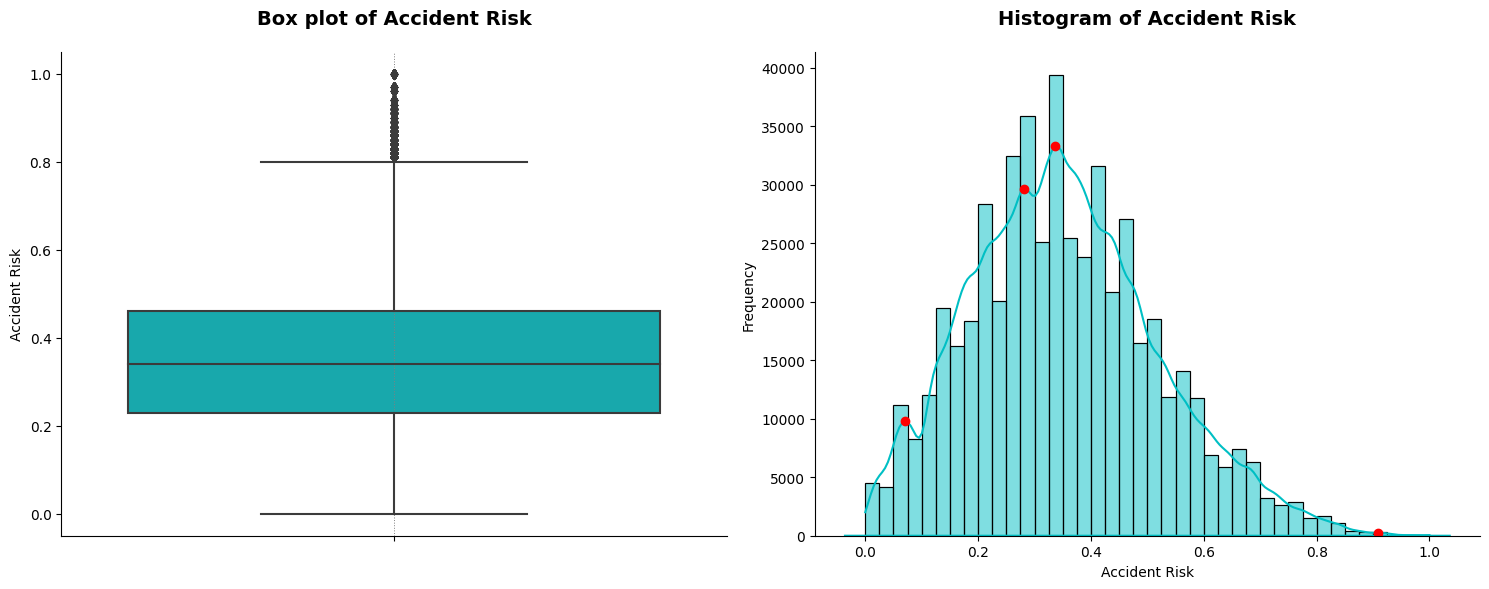

In [15]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=df_train, y = "accident_risk", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of Accident Risk", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("Accident Risk")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=df_train, x = "accident_risk", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of Accident Risk", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("Accident Risk")
ax[1].set_ylabel("Frequency")
# ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(df_train["accident_risk"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**General Analysis of the Distribution of `Accident Risk`**

**Box Plot:**

* The accident risk distribution shows a **moderate interquartile range (IQR)**, spanning approximately **0.22–0.45**.
* The **median accident risk** is around **0.33–0.35**, suggesting that most cases fall within a **low-to-moderate risk range**.
* A number of **notable outliers** appear above **0.80**, with some reaching values close to **1.0**.
* This indicates the existence of a **small group of very high-risk cases**, standing apart from the general population.
* The box plot reflects a **slightly right-skewed pattern**, with the majority of values concentrated below the upper whisker.

**Histogram:**

* The histogram confirms a **right-skewed distribution**, with most accident risks concentrated in the **0.2–0.4 range**.
* A clear **peak occurs around 0.3–0.35**, representing the most common risk level.
* The frequency declines gradually beyond **0.5**, but a **longer tail** persists towards **0.8–1.0**, driven by outliers.
* Multiple **secondary peaks** suggest a **multimodal structure**, potentially indicating different subgroups within the data (e.g., low, medium, and high risk).

**Summary for Reporting:**

> The `Accident Risk` variable exhibits a **slightly right-skewed distribution**, dominated by risk levels between **0.2–0.4**, with a small but important cluster of **high-risk outliers (>0.8)**. These outliers likely represent **special cases with substantially higher accident exposure**.

## Numerical Feature Distributions

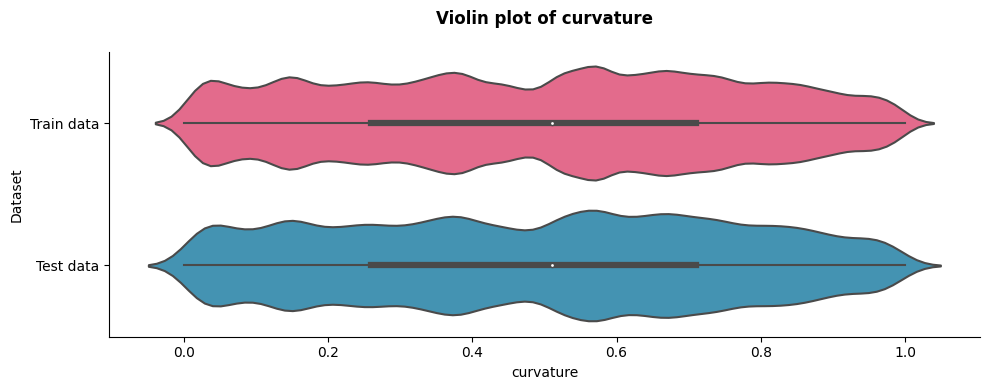

In [16]:
def plot_numerical_features(df_train, df_test, num_features):
    colors = color(n_colors=2)  # The color function you defined earlier
    n = len(num_features)

    fig, ax = plt.subplots(n, 1, figsize=(10, n * 4))
    if n == 1:
        ax = [ax]  # Ensure ax is iterable when there is only one feature

    for i, feature in enumerate(num_features):
        # Combine data for violin plot
        df_plot = pd.concat([
            pd.DataFrame({"Dataset": "Train data", feature: df_train[feature]}),
            pd.DataFrame({"Dataset": "Test data", feature: df_test[feature]})
        ]).reset_index(drop=True)

        sns.violinplot(
            data=df_plot,
            x=feature,
            y="Dataset",
            palette=colors,
            ax=ax[i]
        )
        ax[i].set_title(f"Violin plot of {feature}", pad=20, weight="bold")
        # ax[i].grid(color="gray", linestyle=":", linewidth=0.7)
        sns.despine(left=False, bottom=False, ax=ax[i])

    plt.tight_layout()
    plt.show()

# Call the function
plot_numerical_features(
    df_train=df_train,
    df_test=df_test,
    num_features=num_features
)

In [17]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for {dataset_name}:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<9} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+9.4f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

num_features_train = ["curvature", "accident_risk"]
num_features_test = ["curvature"]
skew_feature_train, skew_train_df = check_skewness(df_train, "Train Data", numerical_features=num_features_train)
skew_feature_test, skew_test_df = check_skewness(df_test, "Test Data", numerical_features=num_features_test)


🔍 Skewness for Train Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
accident_risk                  |   +0.3784 | Approximately symmetric
curvature                      |   -0.0387 | Approximately symmetric
----------------------------------------------------------------------

🔍 Skewness for Test Data:
----------------------------------------------------------------------
Feature                        | Skewness  | Remark
----------------------------------------------------------------------
curvature                      |   -0.0293 | Approximately symmetric
----------------------------------------------------------------------


### **General Insights on Distribution of Curvature and Accident Risk**

* **Accident Risk (train data):**

  * Skewness = **+0.3784** → slightly right-skewed but still **approximately symmetric**.
  * Most values are concentrated around **0.3–0.4**, with a few higher values creating a long right tail.

* **Curvature (train & test data):**

  * Skewness = **-0.0387** (train) and **-0.0293** (test) → both close to **0**, indicating an **almost symmetric distribution**.
  * Violin plots confirm that train and test datasets have **very similar distribution shapes**, with the median near the center and data spread evenly from 0 to 1, showing no notable skew.

**Key Takeaways**

* Both **train** and **test datasets** show that `curvature` and `accident_risk` are **well-balanced with minimal skewness**.
* The distributions between train and test are **highly consistent**, which supports modeling without requiring heavy transformations such as log or Box-Cox.
* This consistency ensures that the data can be used directly for modeling with minimal preprocessing.

👉 **In summary:** The key variables demonstrate **near-symmetric distributions** with consistent patterns across train and test sets, providing a **stable foundation for model training and evaluation**.

### Correlation Analysis of Numerical Features

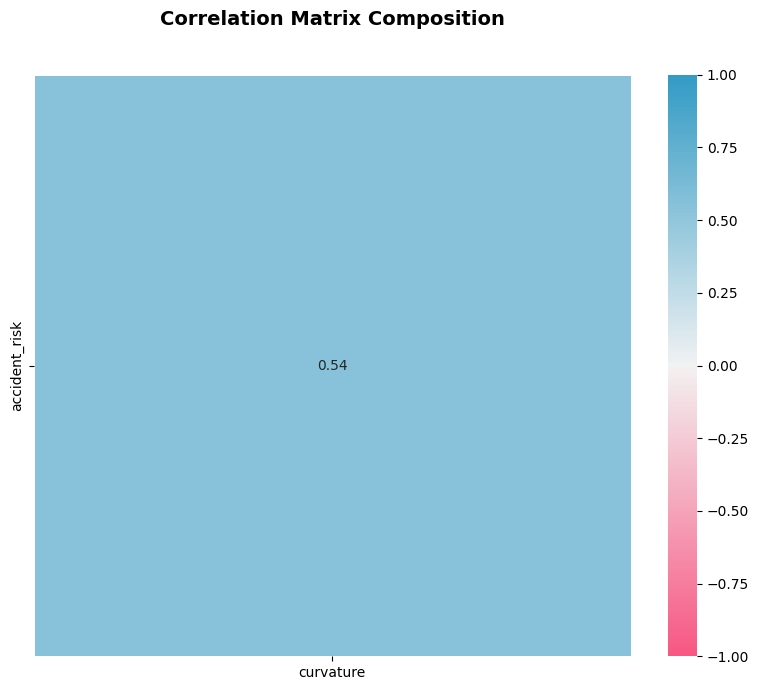

In [18]:
corr_matrix = df_train.drop(columns=cat_features, axis=1).corr(numeric_only=True, method="pearson")
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (8, 7))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "Correlation Matrix Composition\n"
ax.set_title(title, loc="center", fontsize=14, weight="bold", pad=20)

plt.tight_layout()
plt.show()

#### **Correlation Analysis between Curvature and Accident Risk**

* The correlation heatmap shows a **moderate positive correlation** of **0.54** between `curvature` and `accident_risk`.
* This indicates that roads with higher curvature are generally associated with a greater likelihood of accidents.
* Although the correlation is not very strong, it is **statistically meaningful** and suggests that `curvature` can serve as a **significant explanatory variable** in accident risk prediction models.
* This relationship reinforces the importance of including curvature as a **key feature** in subsequent modeling steps.

## Categorical Feature Distributions

In [19]:
# Group num_reported_accidents
def group_num_accidents(row):
    if row == 0:
        return "0"
    elif row == 1:
        return "1"
    elif row == 2:
        return "2"
    else:
        return "Greater than 2"
df_train["num_reported_accidents"] = df_train["num_reported_accidents"].apply(group_num_accidents)
df_test["num_reported_accidents"] = df_test["num_reported_accidents"].apply(group_num_accidents)

# Display few rows of each dataset
print("Train Data Preview:")
display(df_train.head())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


road_type num_lanes  curvature speed_limit  lighting weather  \
0     urban         2       0.06          35  daylight   rainy   
1     urban         4       0.99          35  daylight   clear   
2     rural         4       0.63          70       dim   clear   
3   highway         4       0.07          35       dim   rainy   
4     rural         1       0.58          60  daylight   foggy   

  road_signs_present public_road time_of_day holiday school_season  \
0              False        True   afternoon   False          True   
1               True       False     evening    True          True   
2              False        True     morning    True         False   
3               True        True     morning   False         False   
4              False       False     evening    True         False   

  num_reported_accidents  accident_risk  
0                      1           0.13  
1                      0           0.35  
2                      2           0.30  
3                      1           0.21  
4                      1           0.56


Test Data Preview:


road_type num_lanes  curvature speed_limit  lighting weather  \
0   highway         2       0.34          45     night   clear   
1     urban         3       0.04          45       dim   foggy   
2     urban         2       0.59          35       dim   clear   
3     rural         4       0.95          35  daylight   rainy   
4   highway         2       0.86          35  daylight   clear   

  road_signs_present public_road time_of_day holiday school_season  \
0               True        True   afternoon    True          True   
1               True       False   afternoon    True         False   
2               True       False   afternoon    True          True   
3              False       False   afternoon   False         False   
4               True       False     evening   False          True   

  num_reported_accidents  
0                      1  
1                      0  
2                      1  
3                      2  
4         Greater than 2

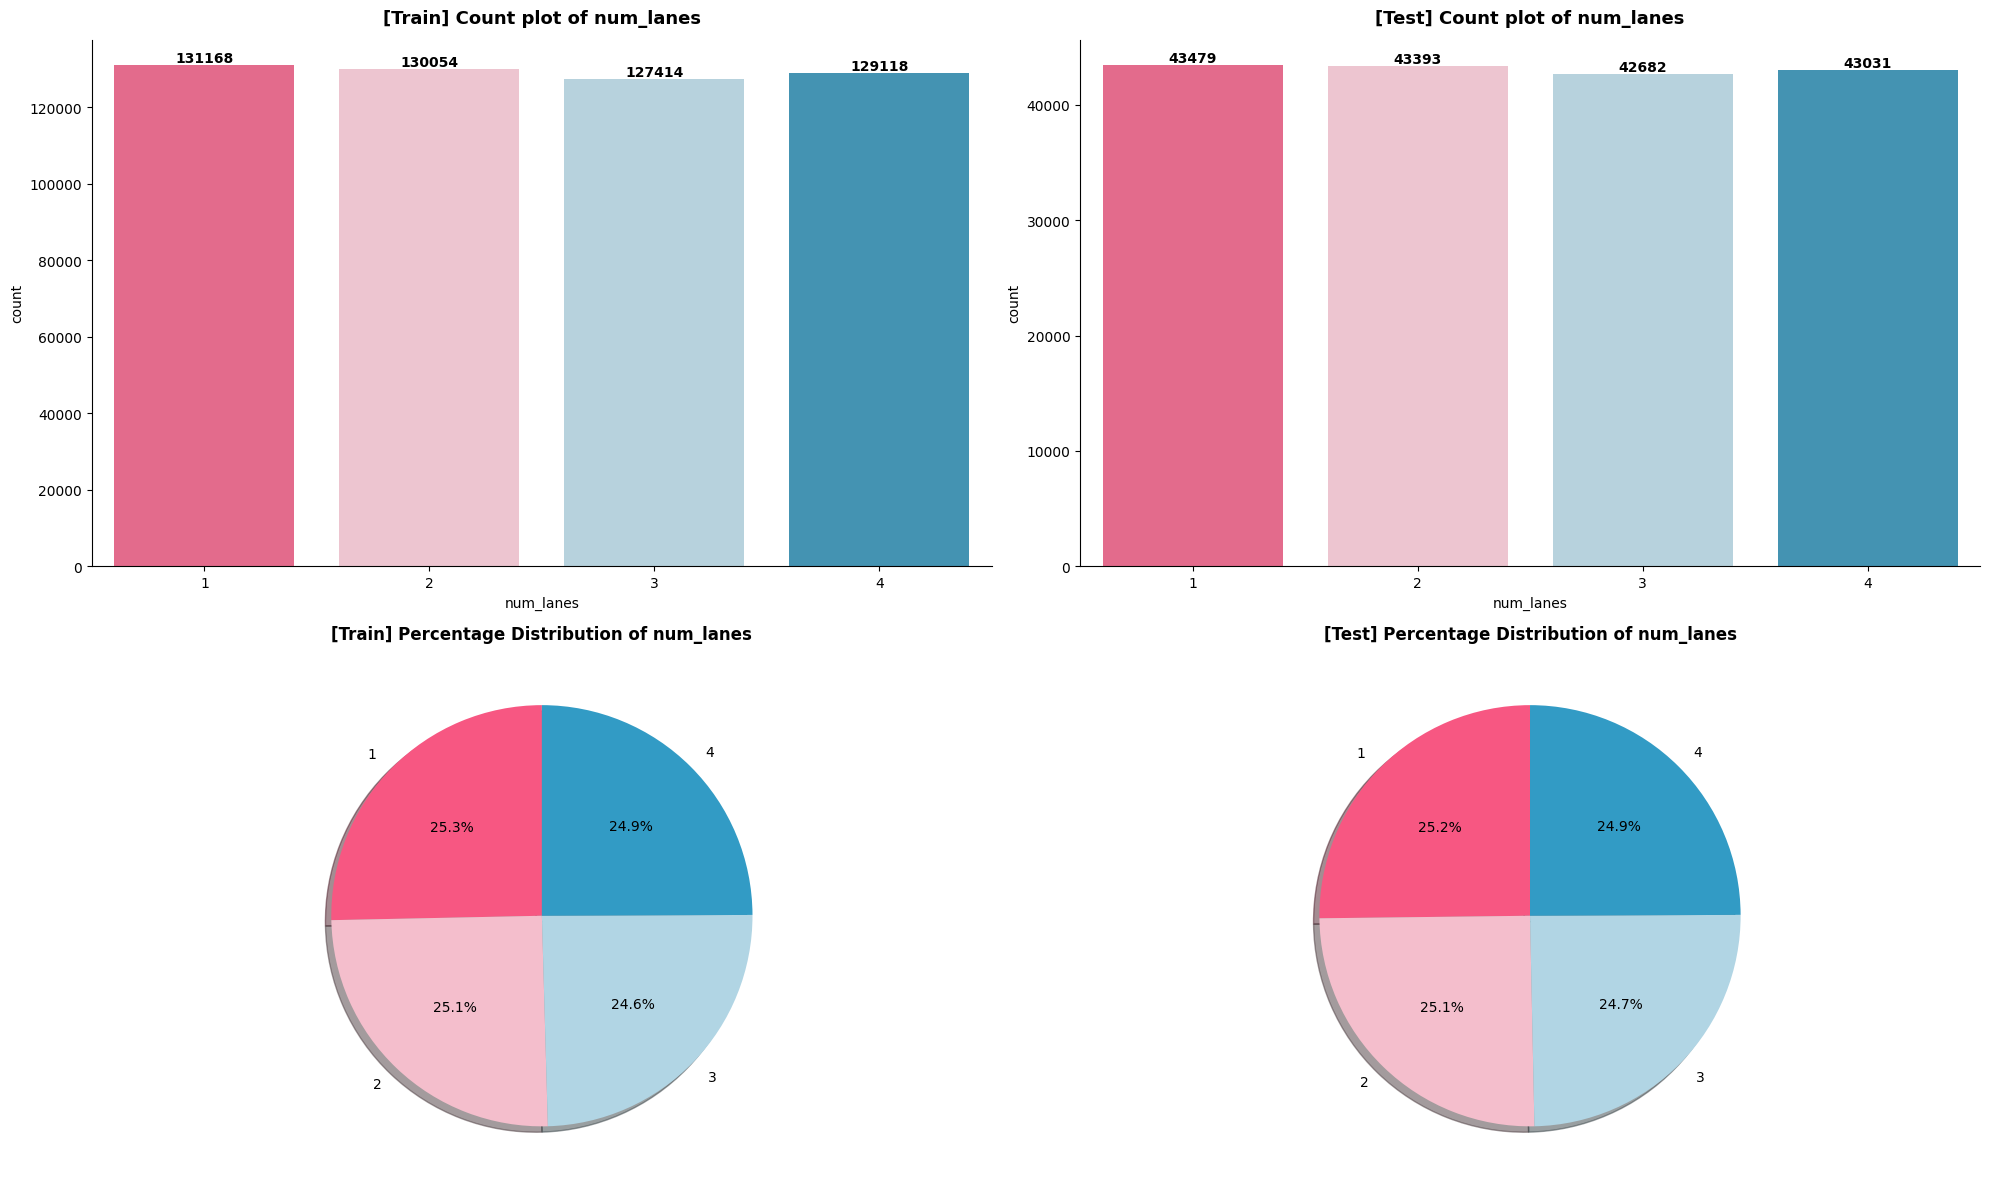

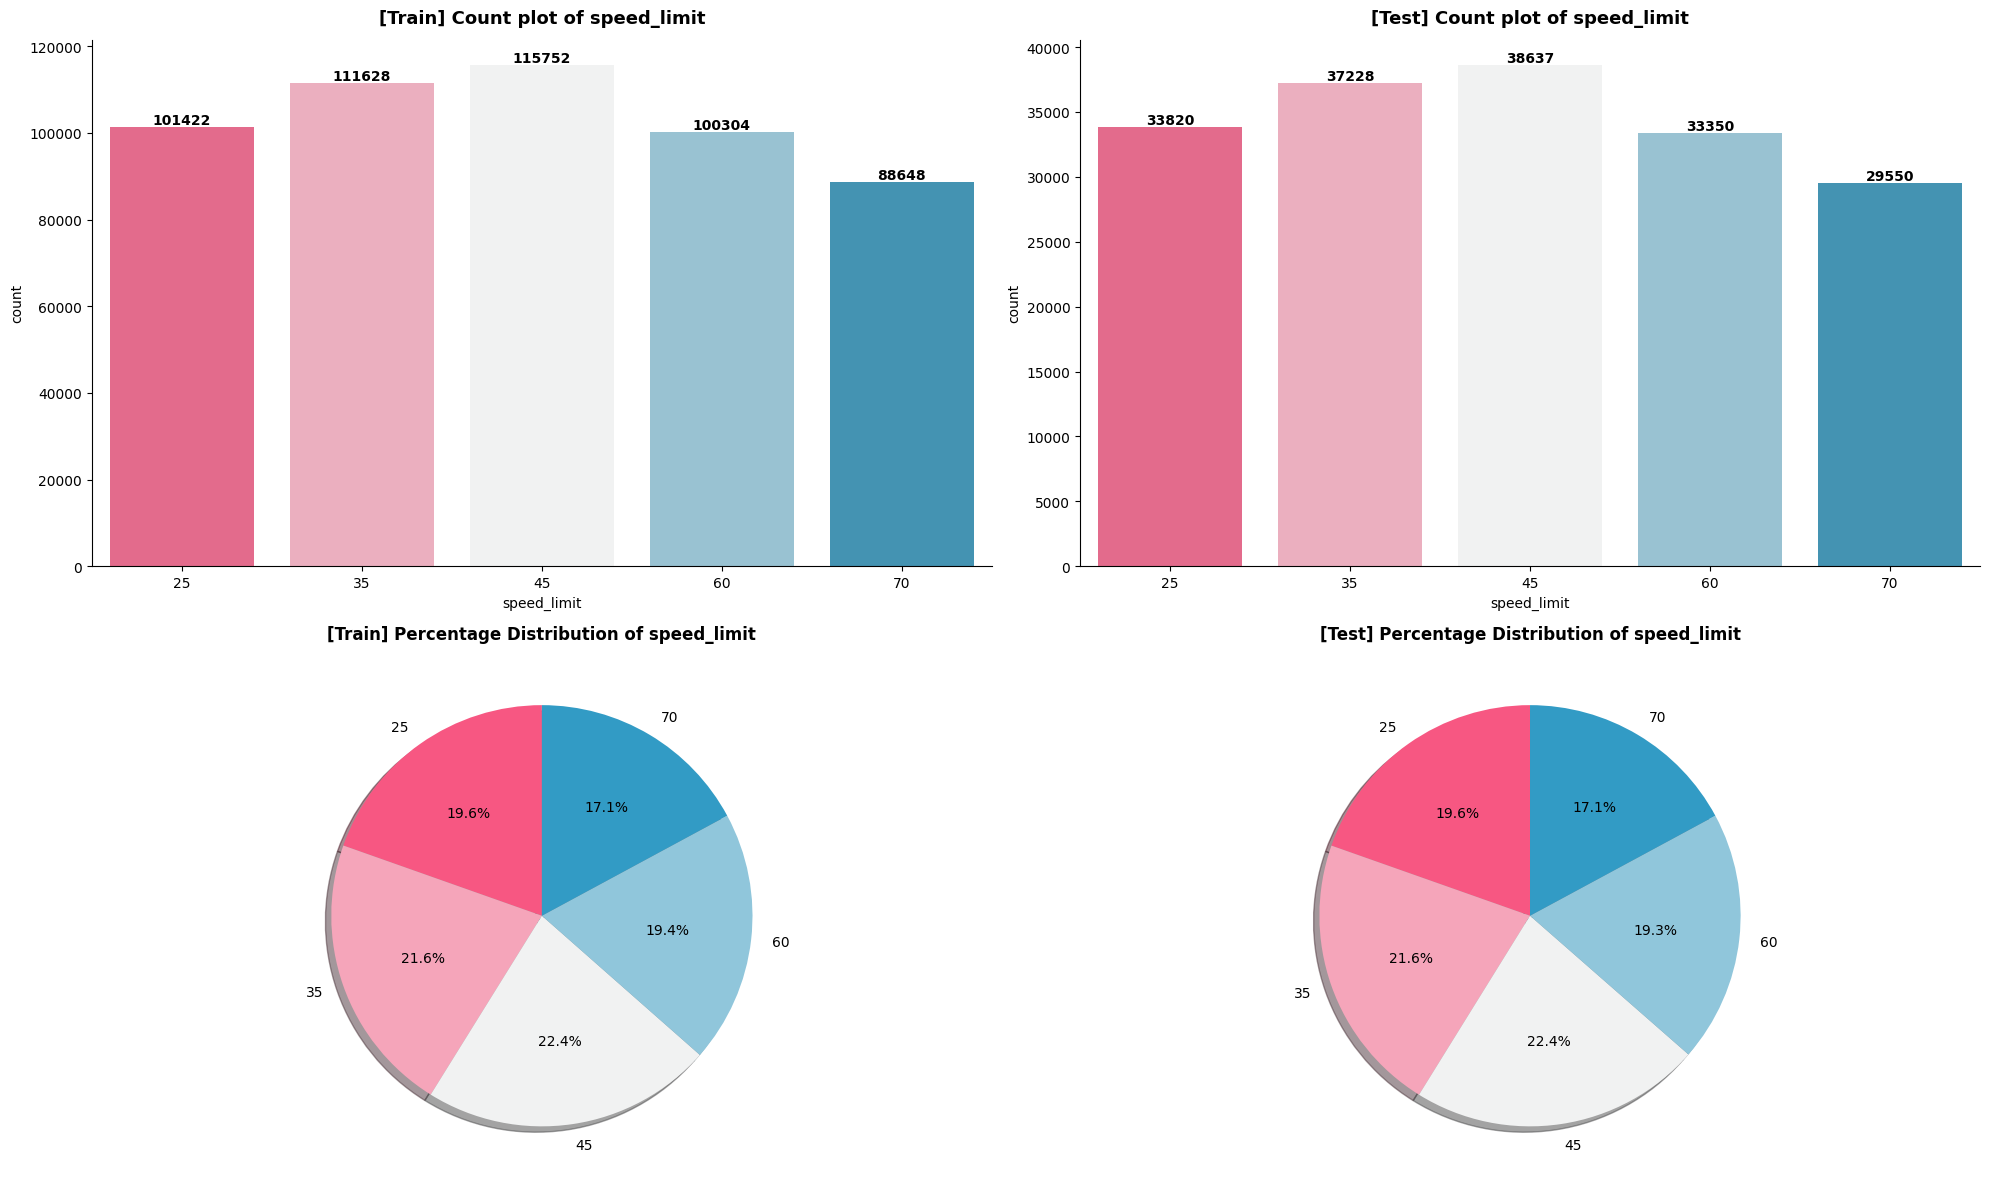

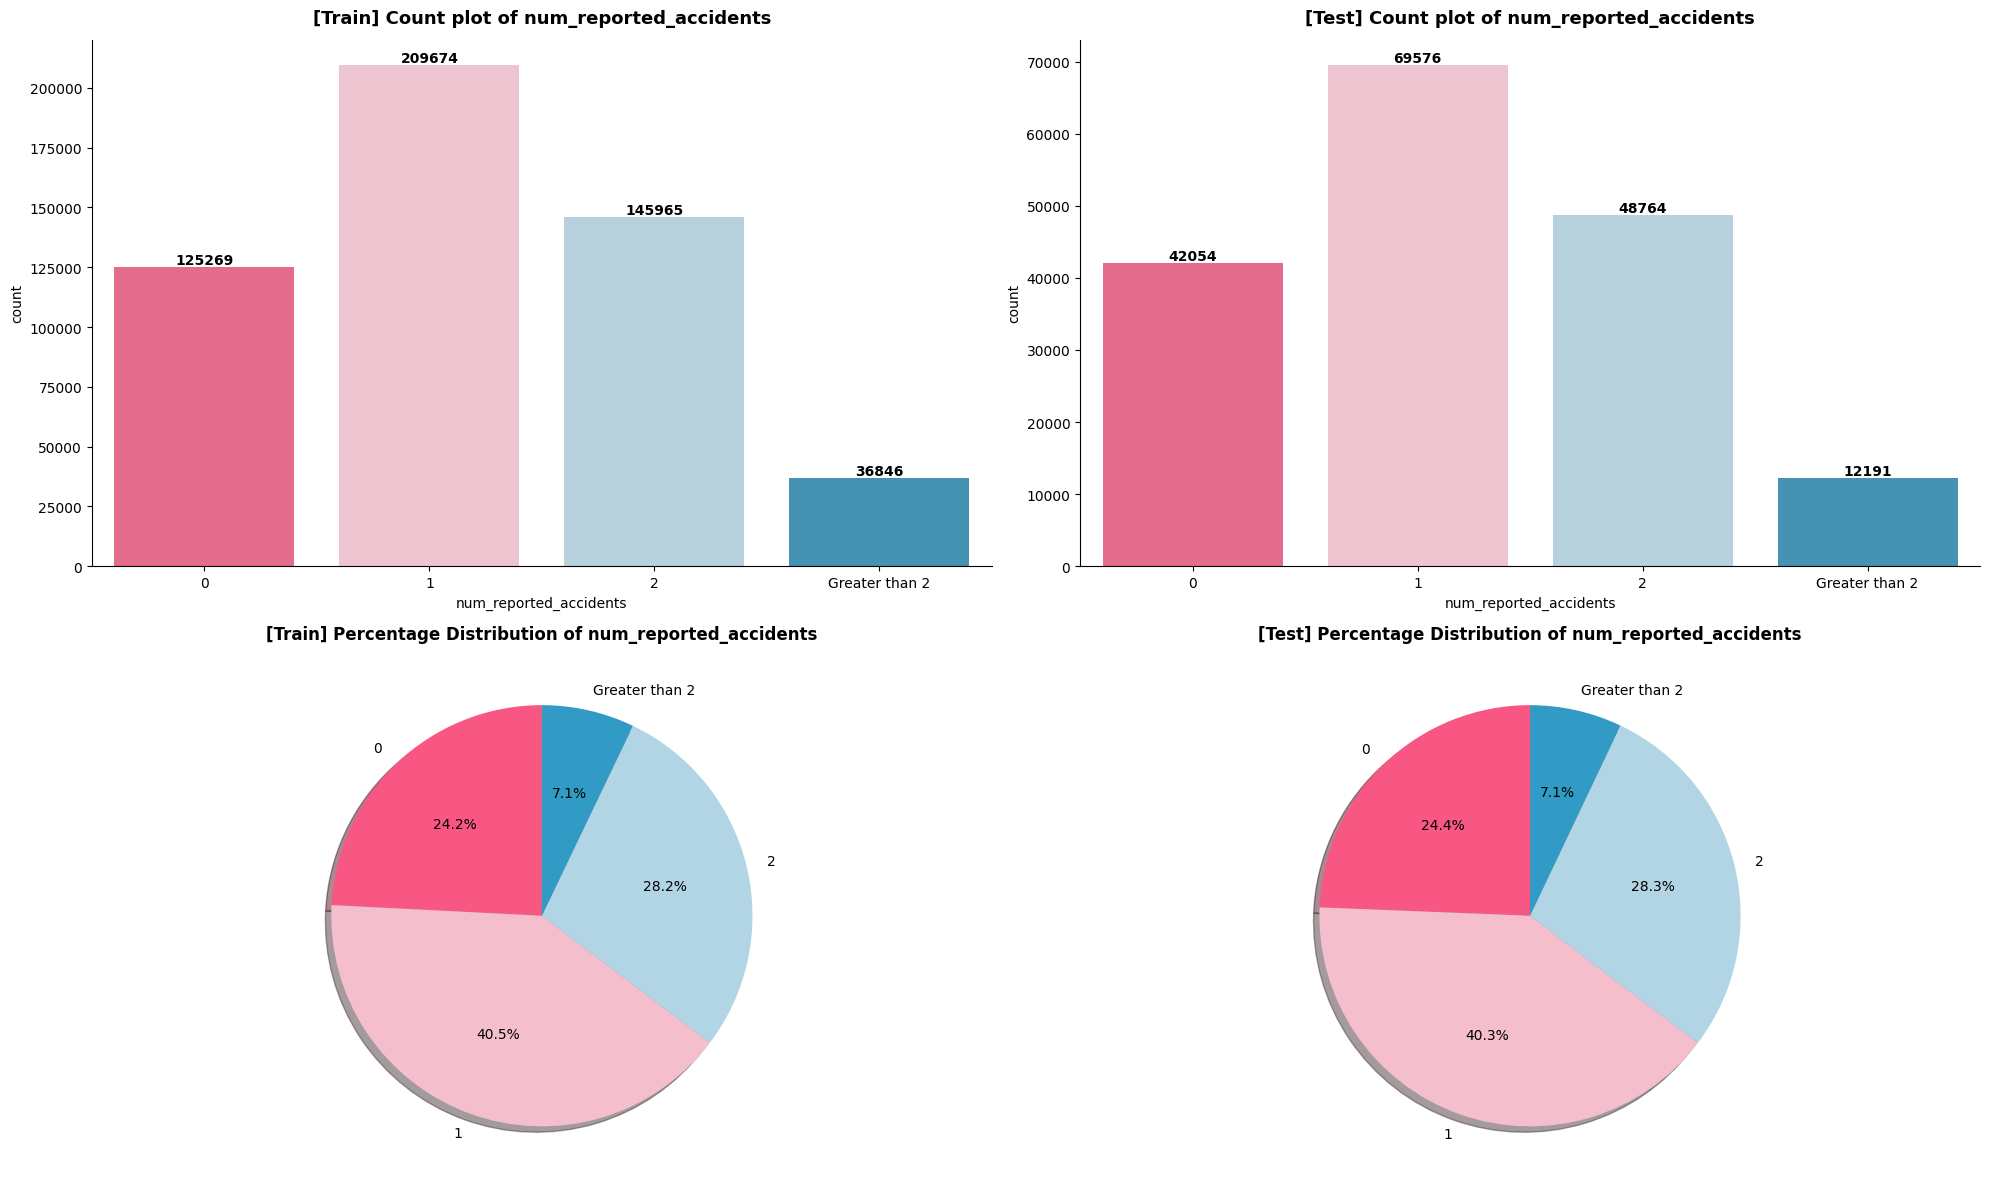

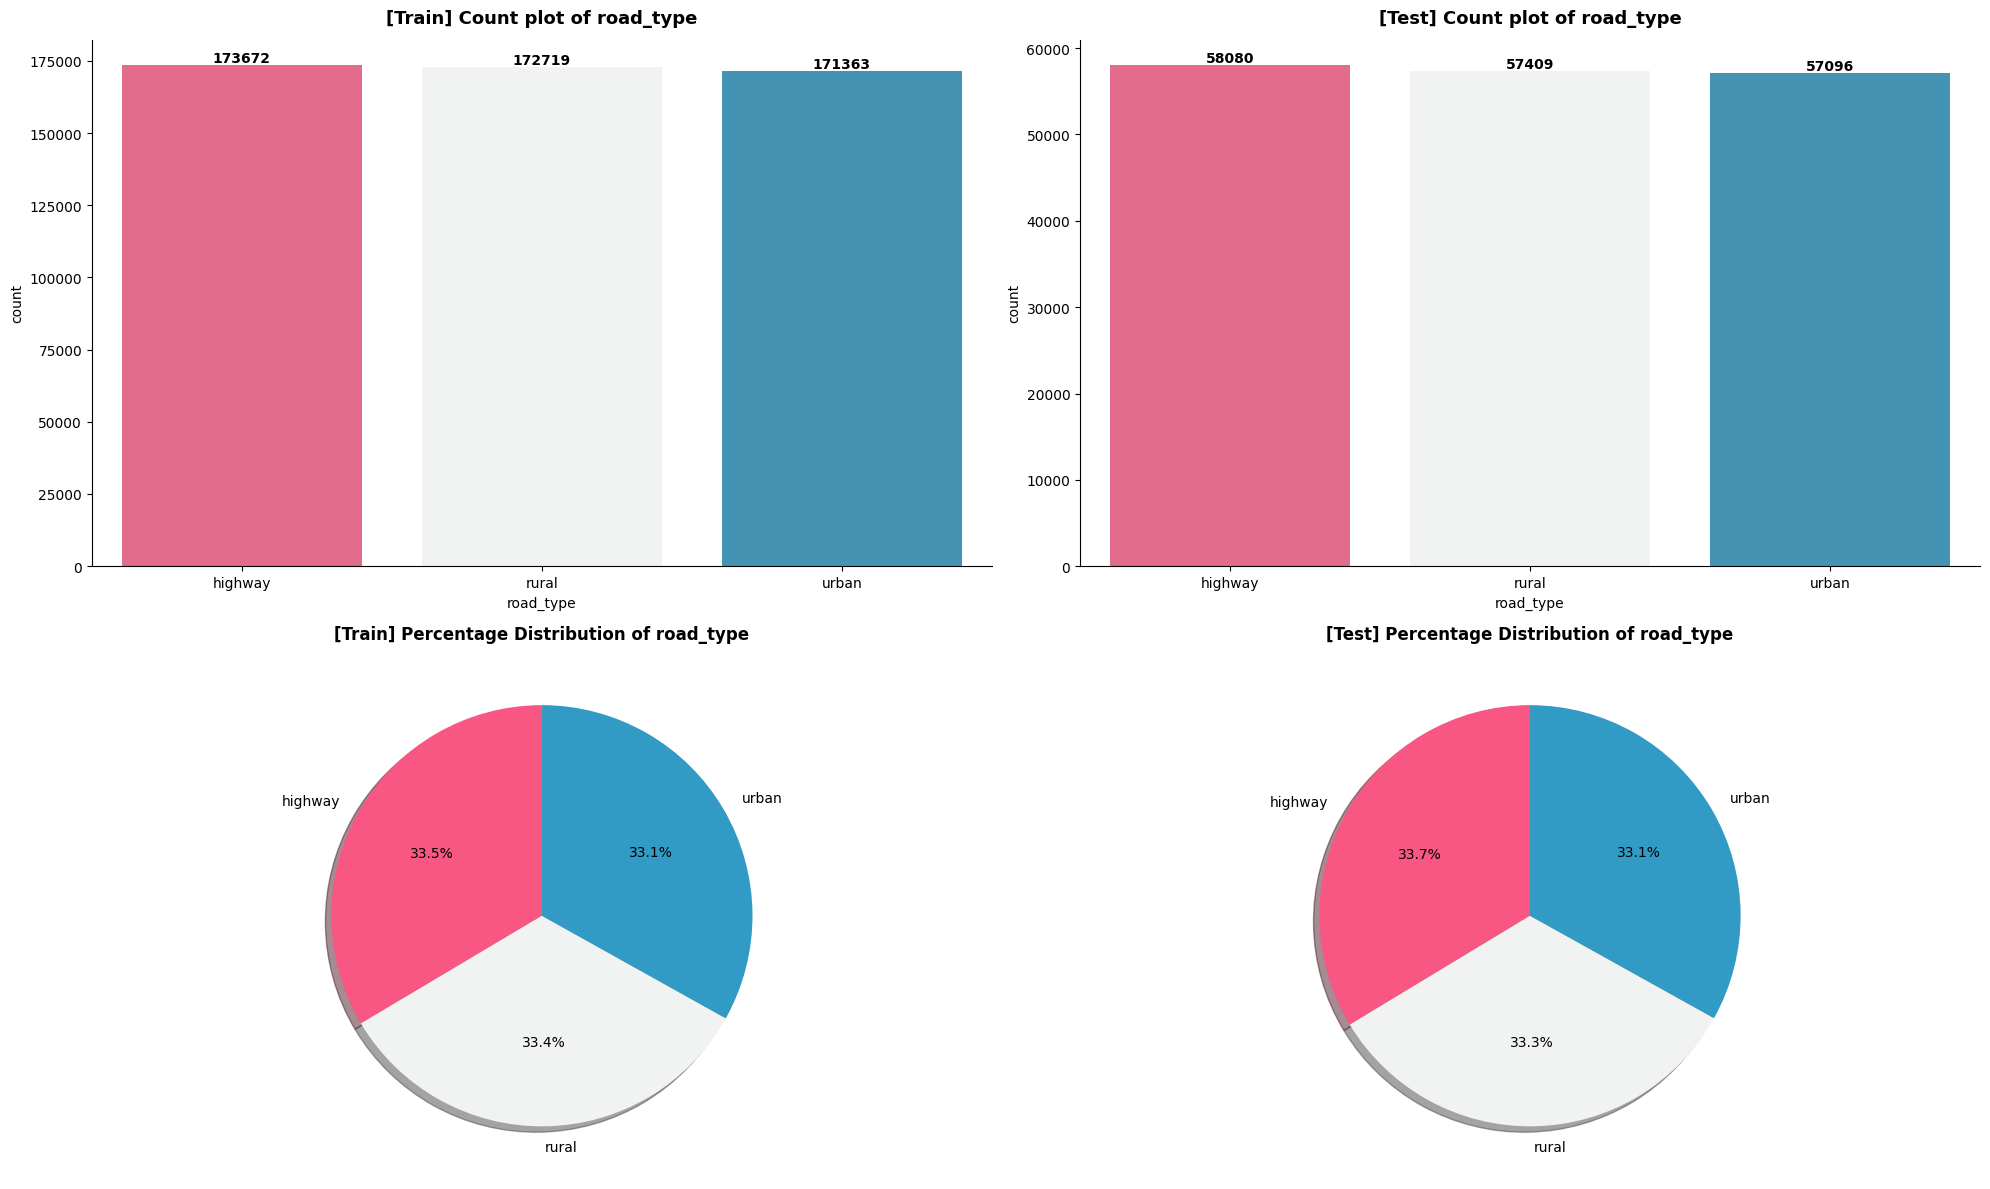

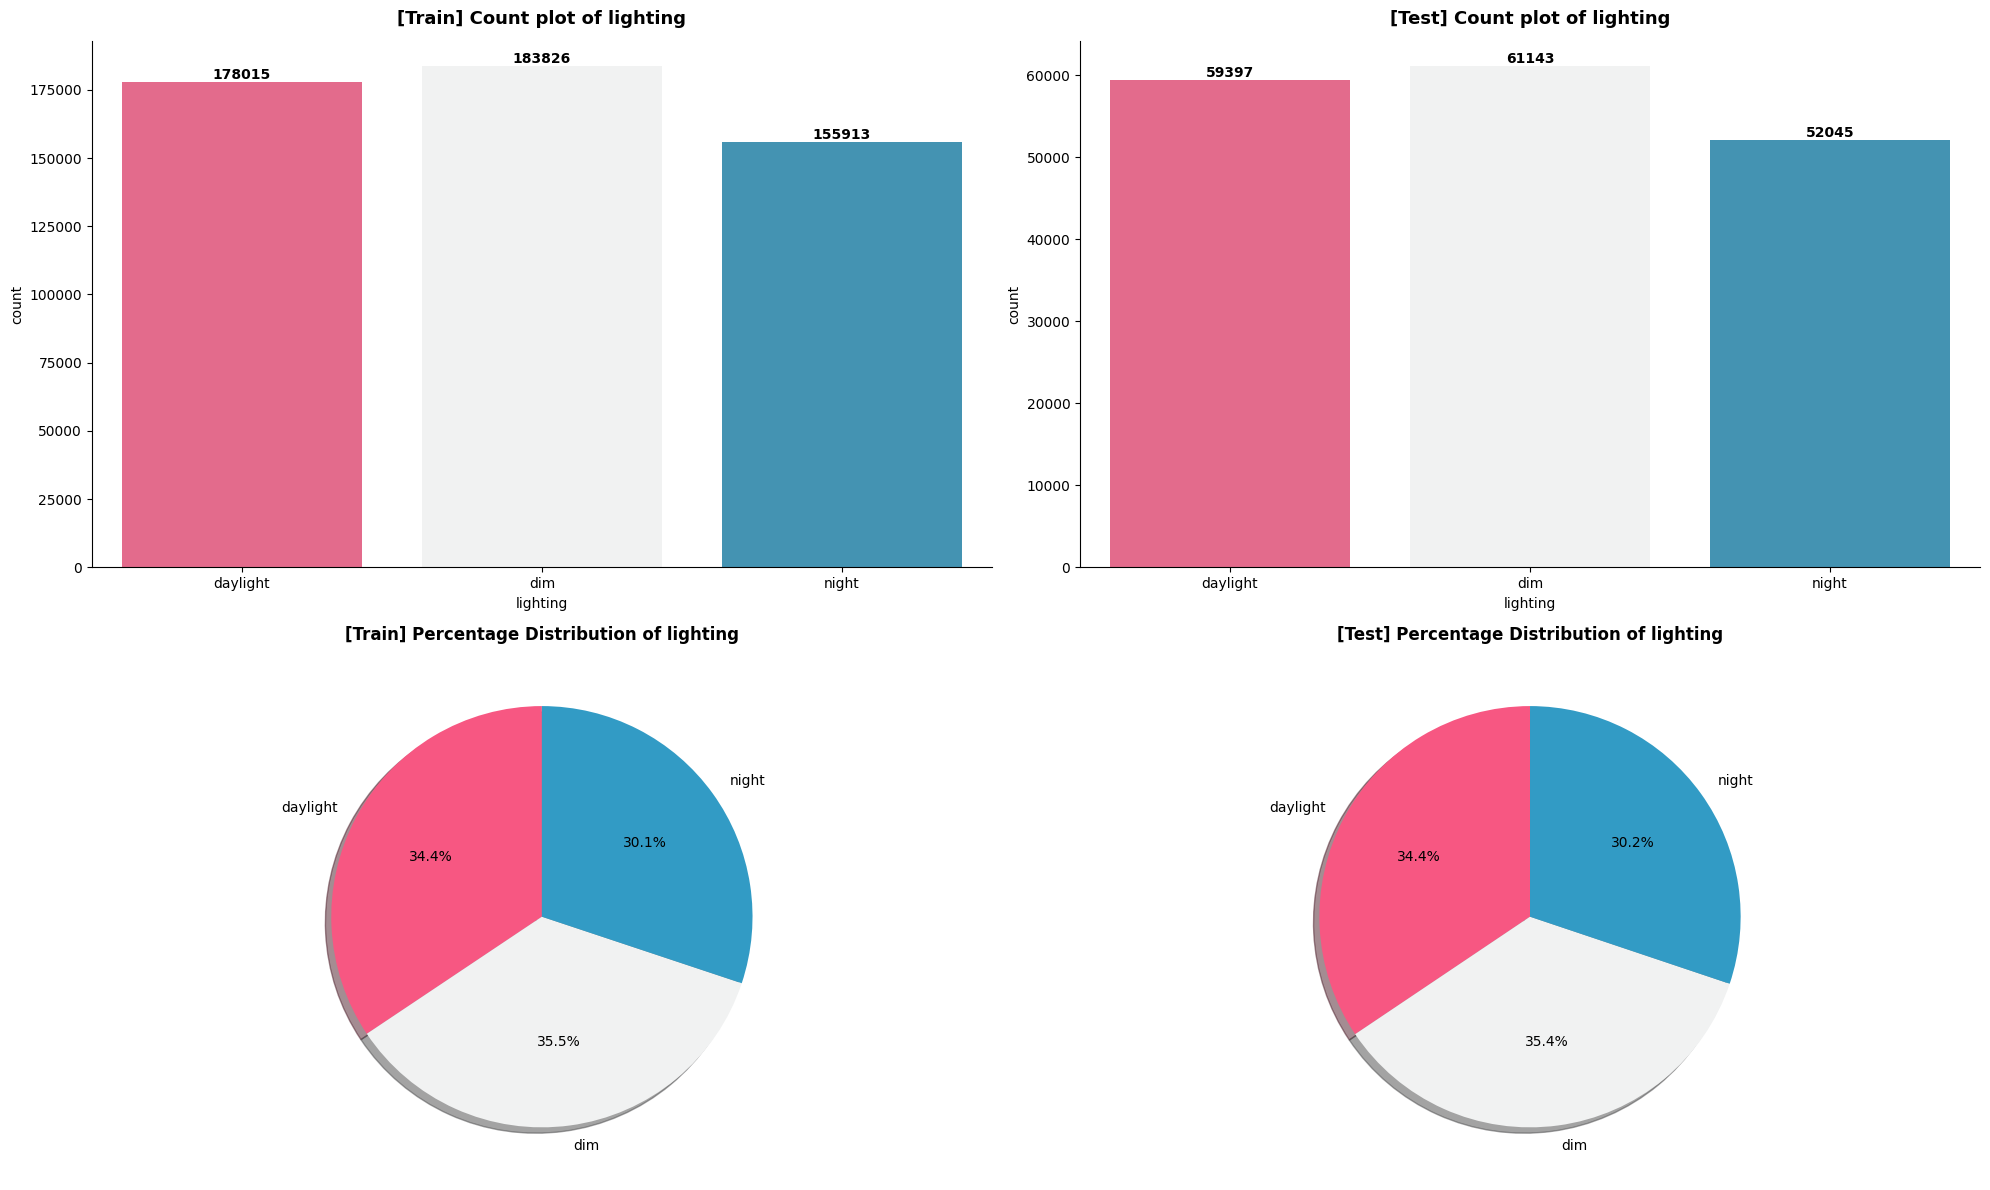

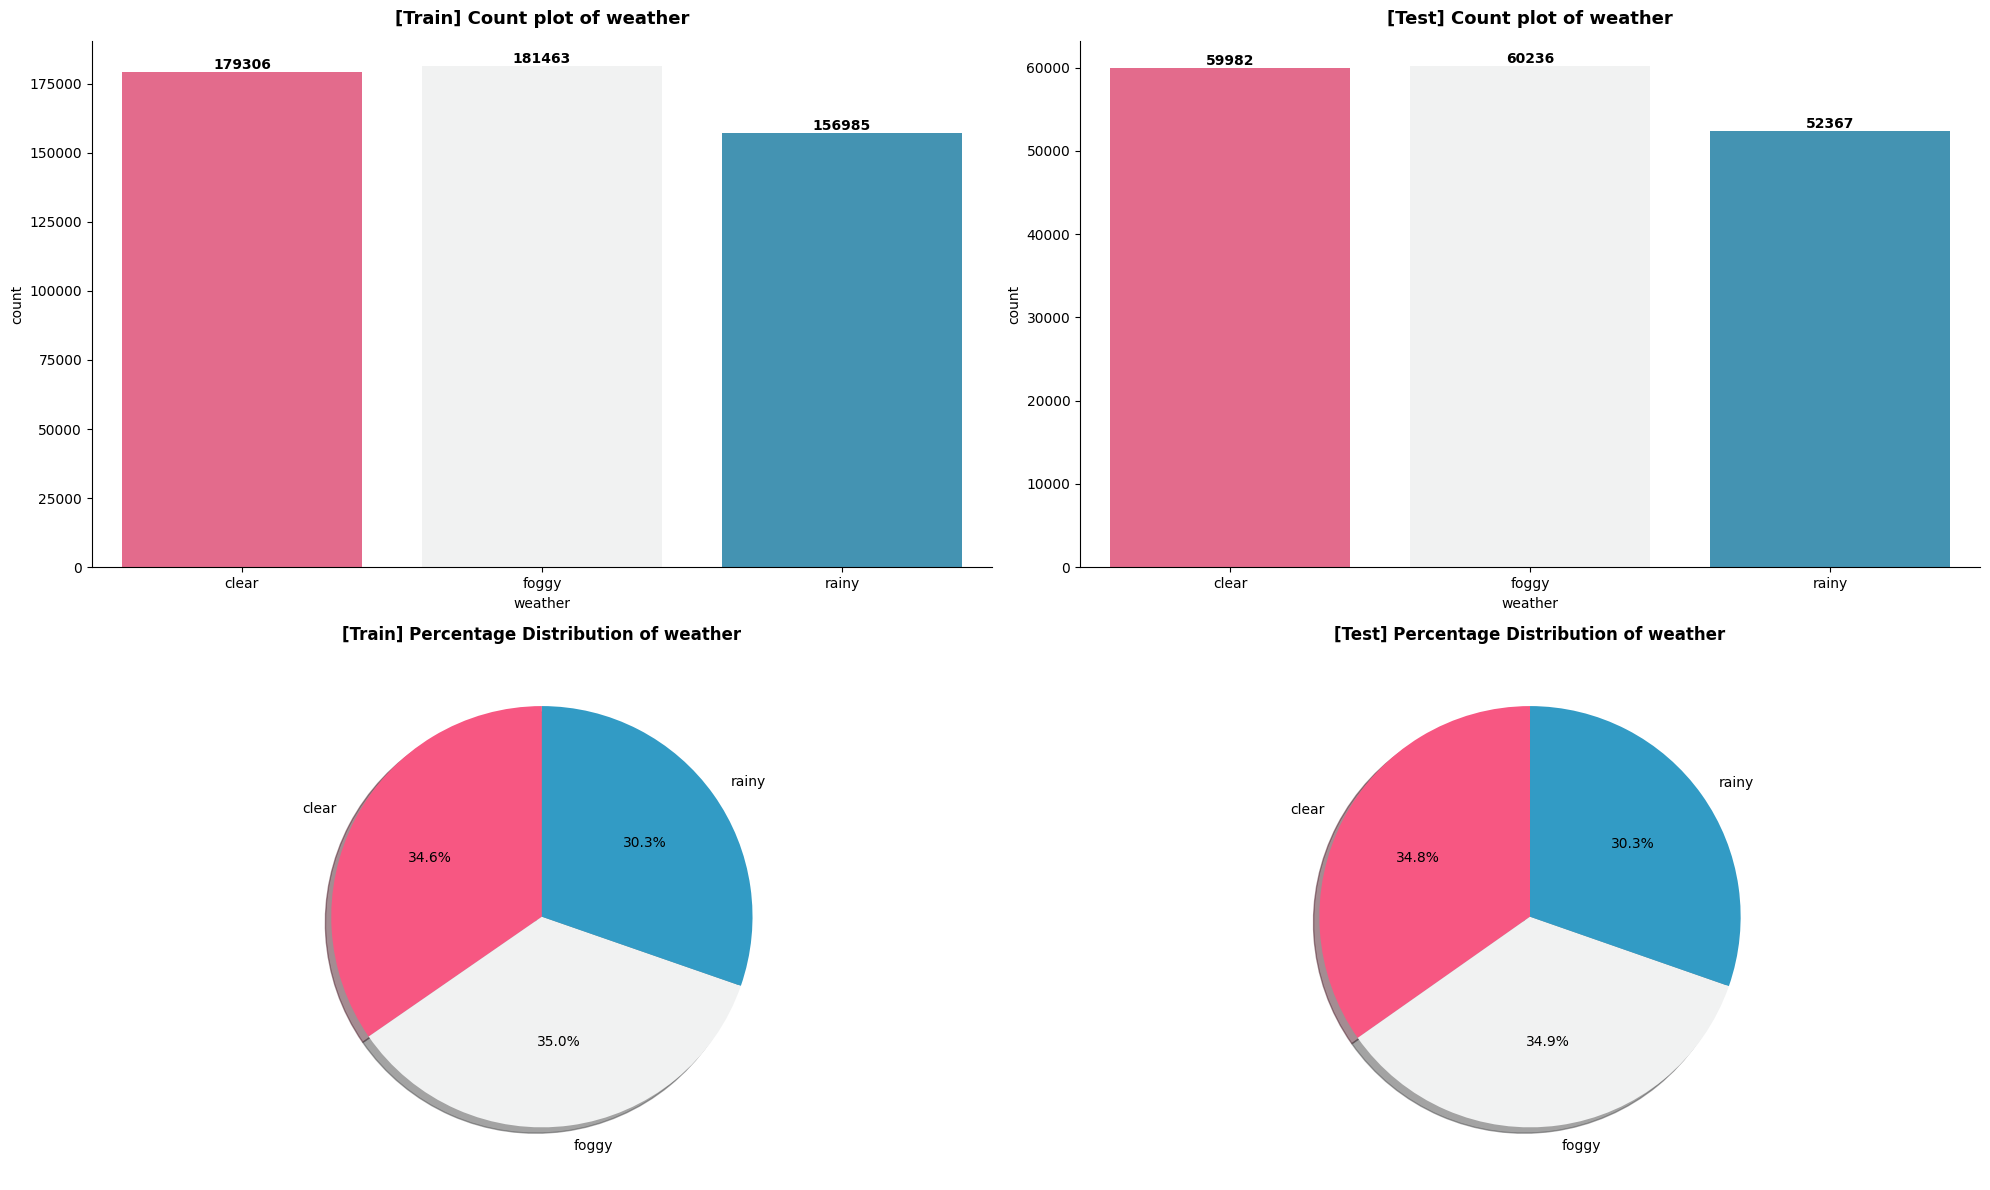

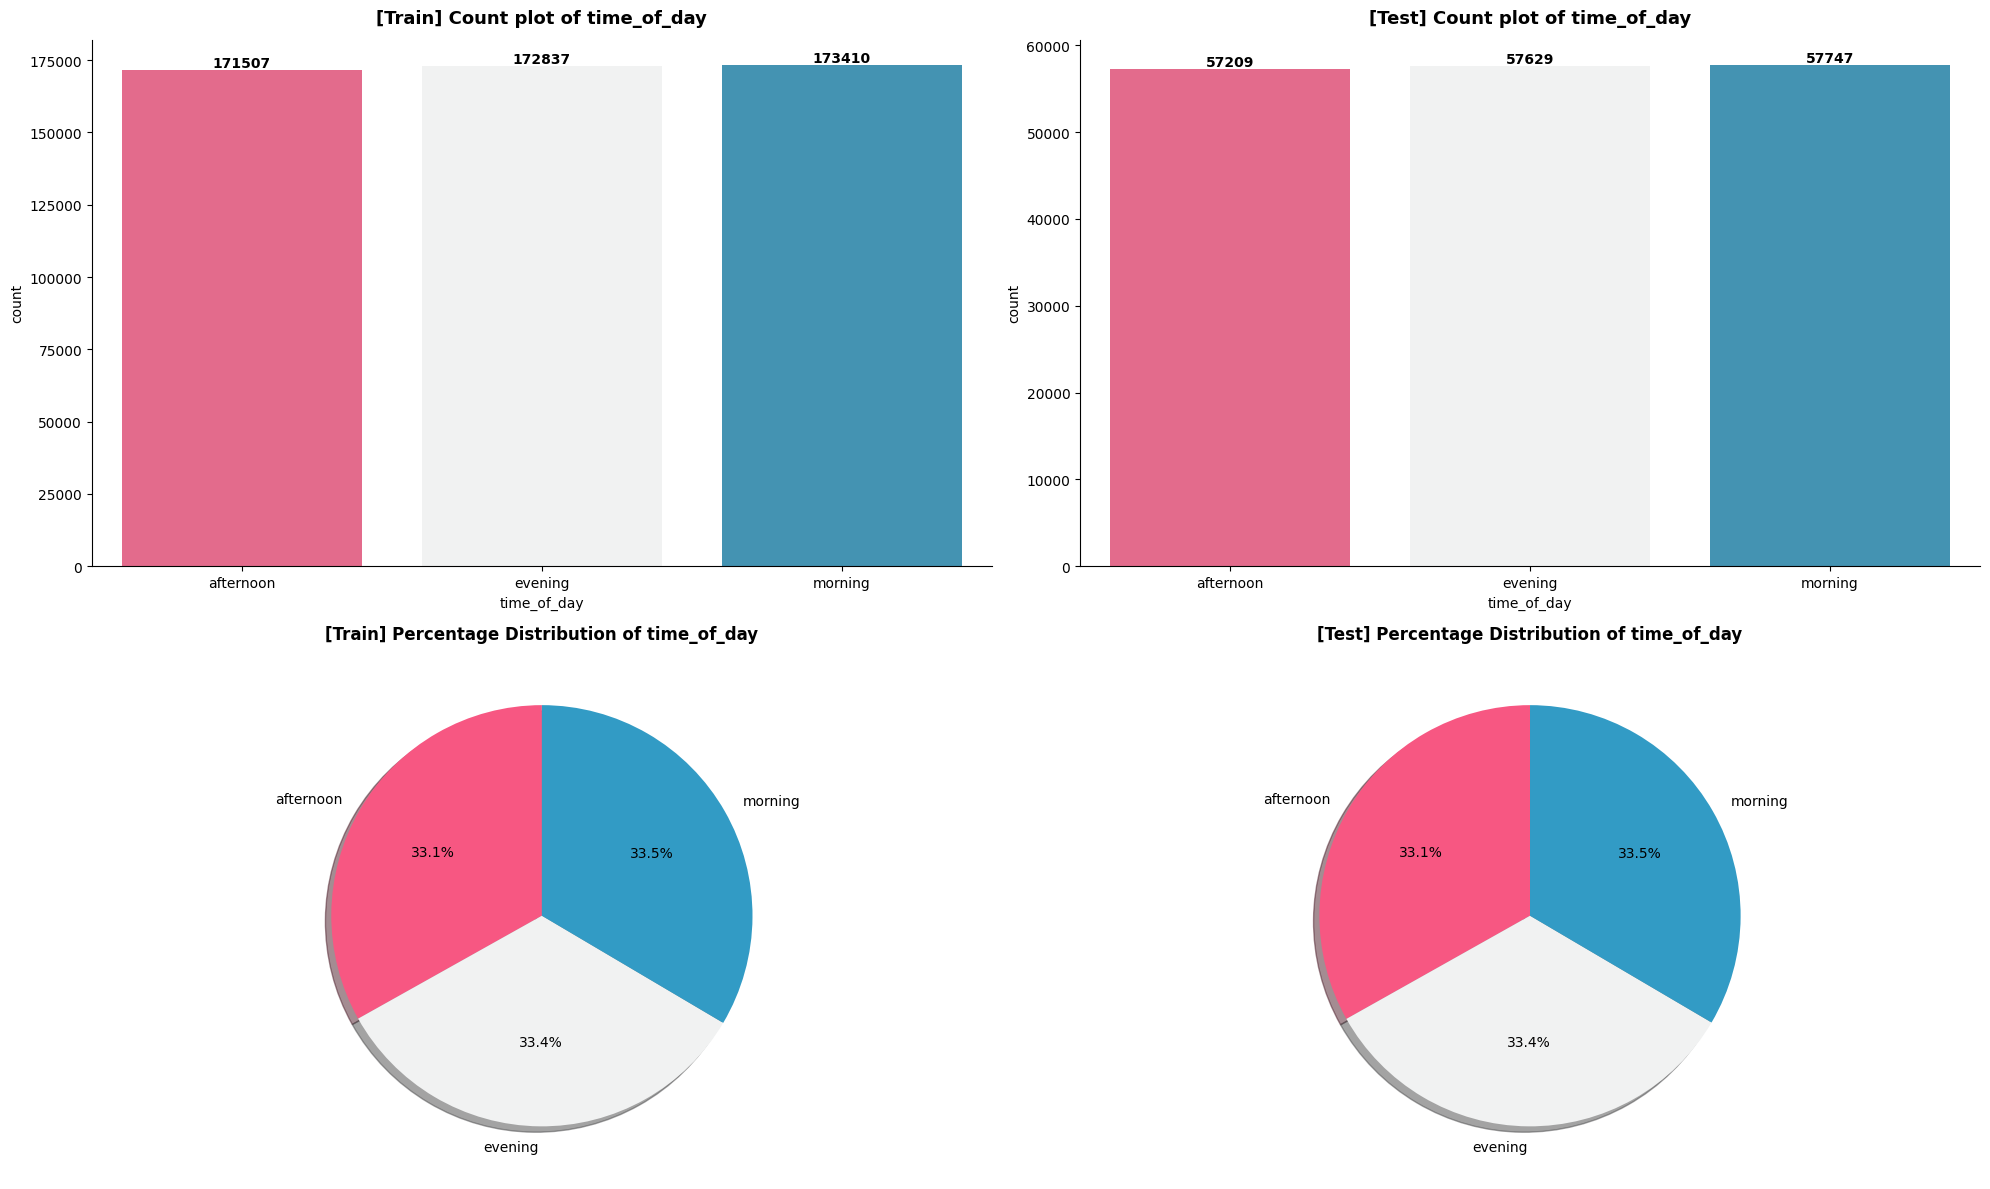

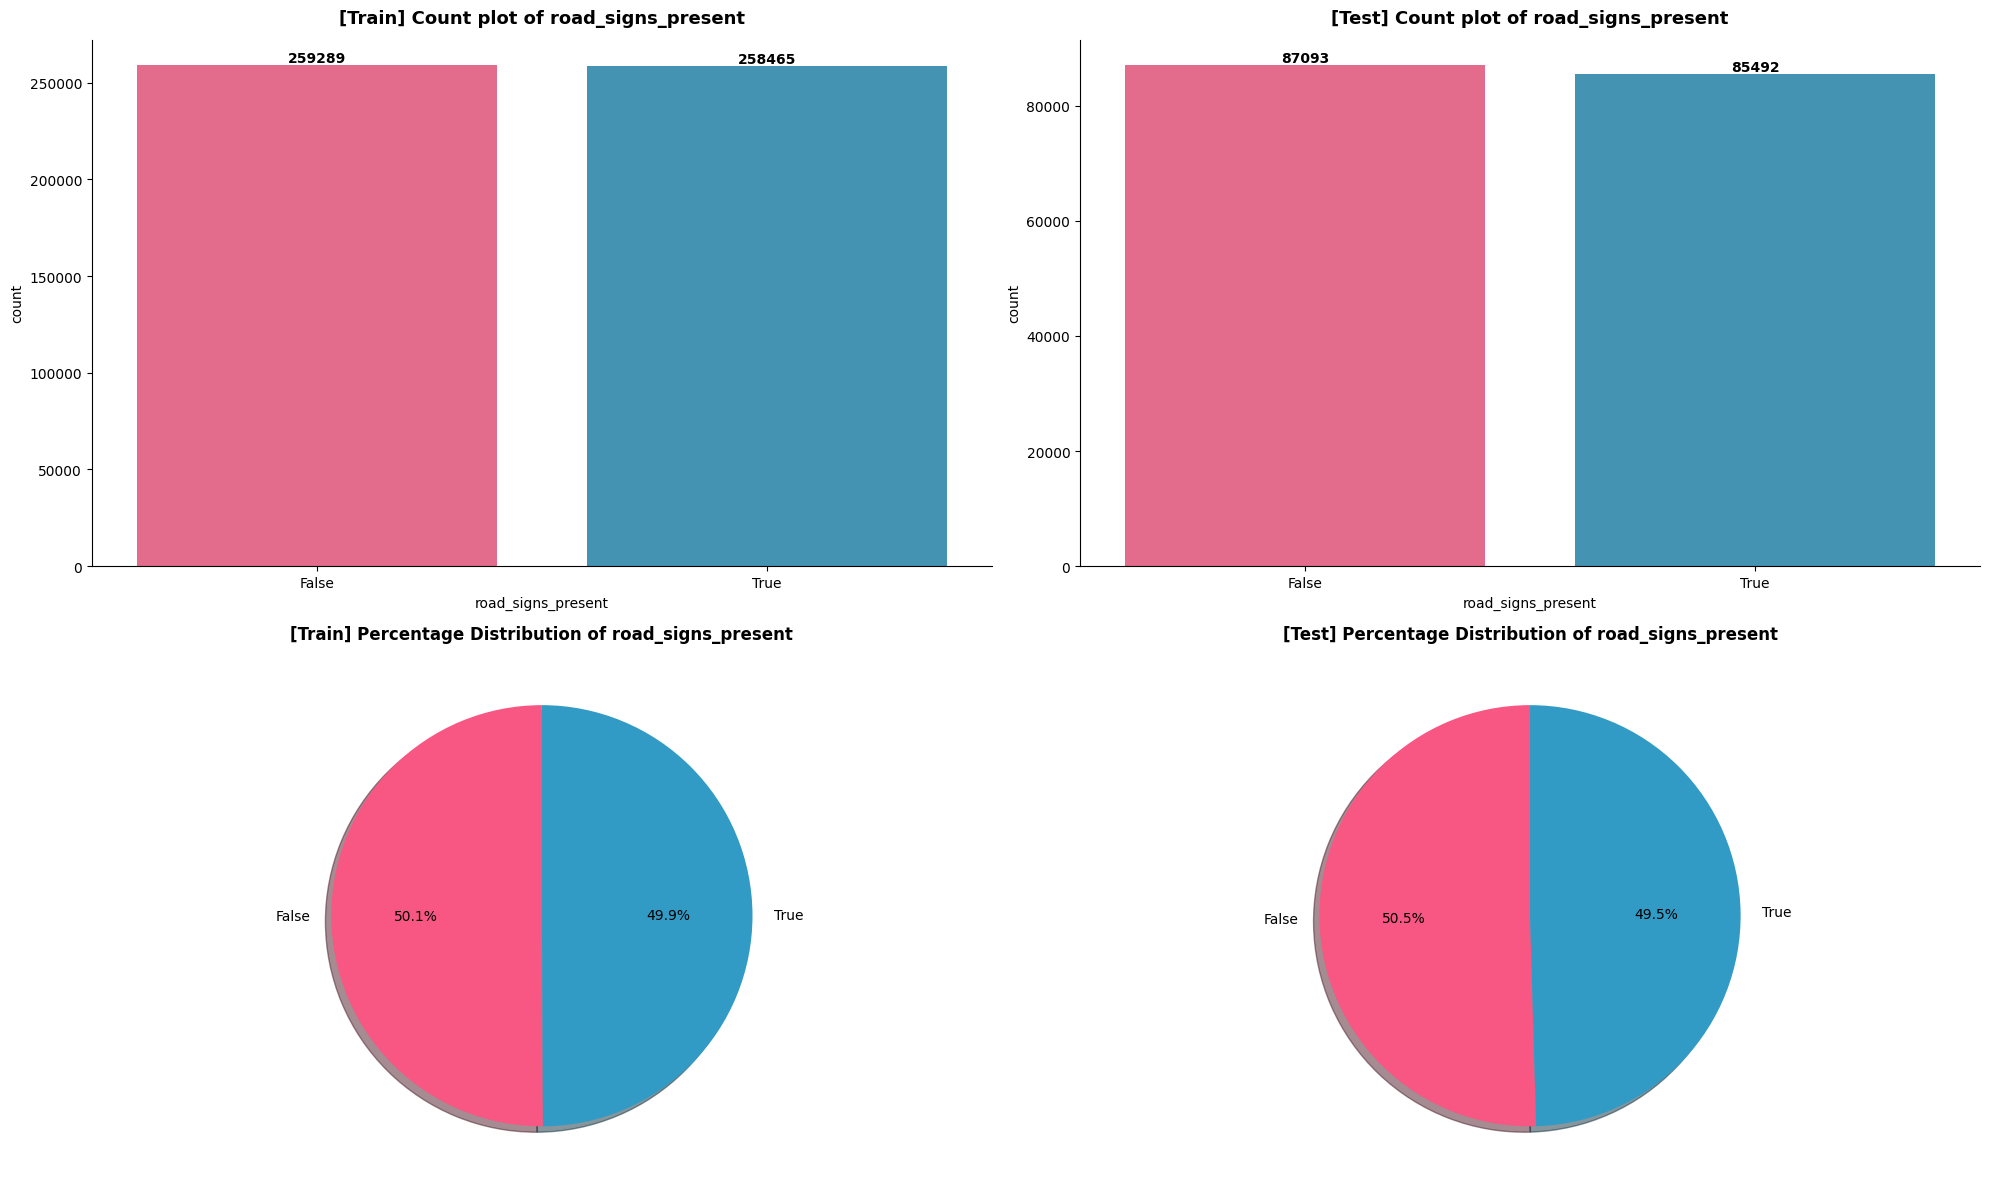

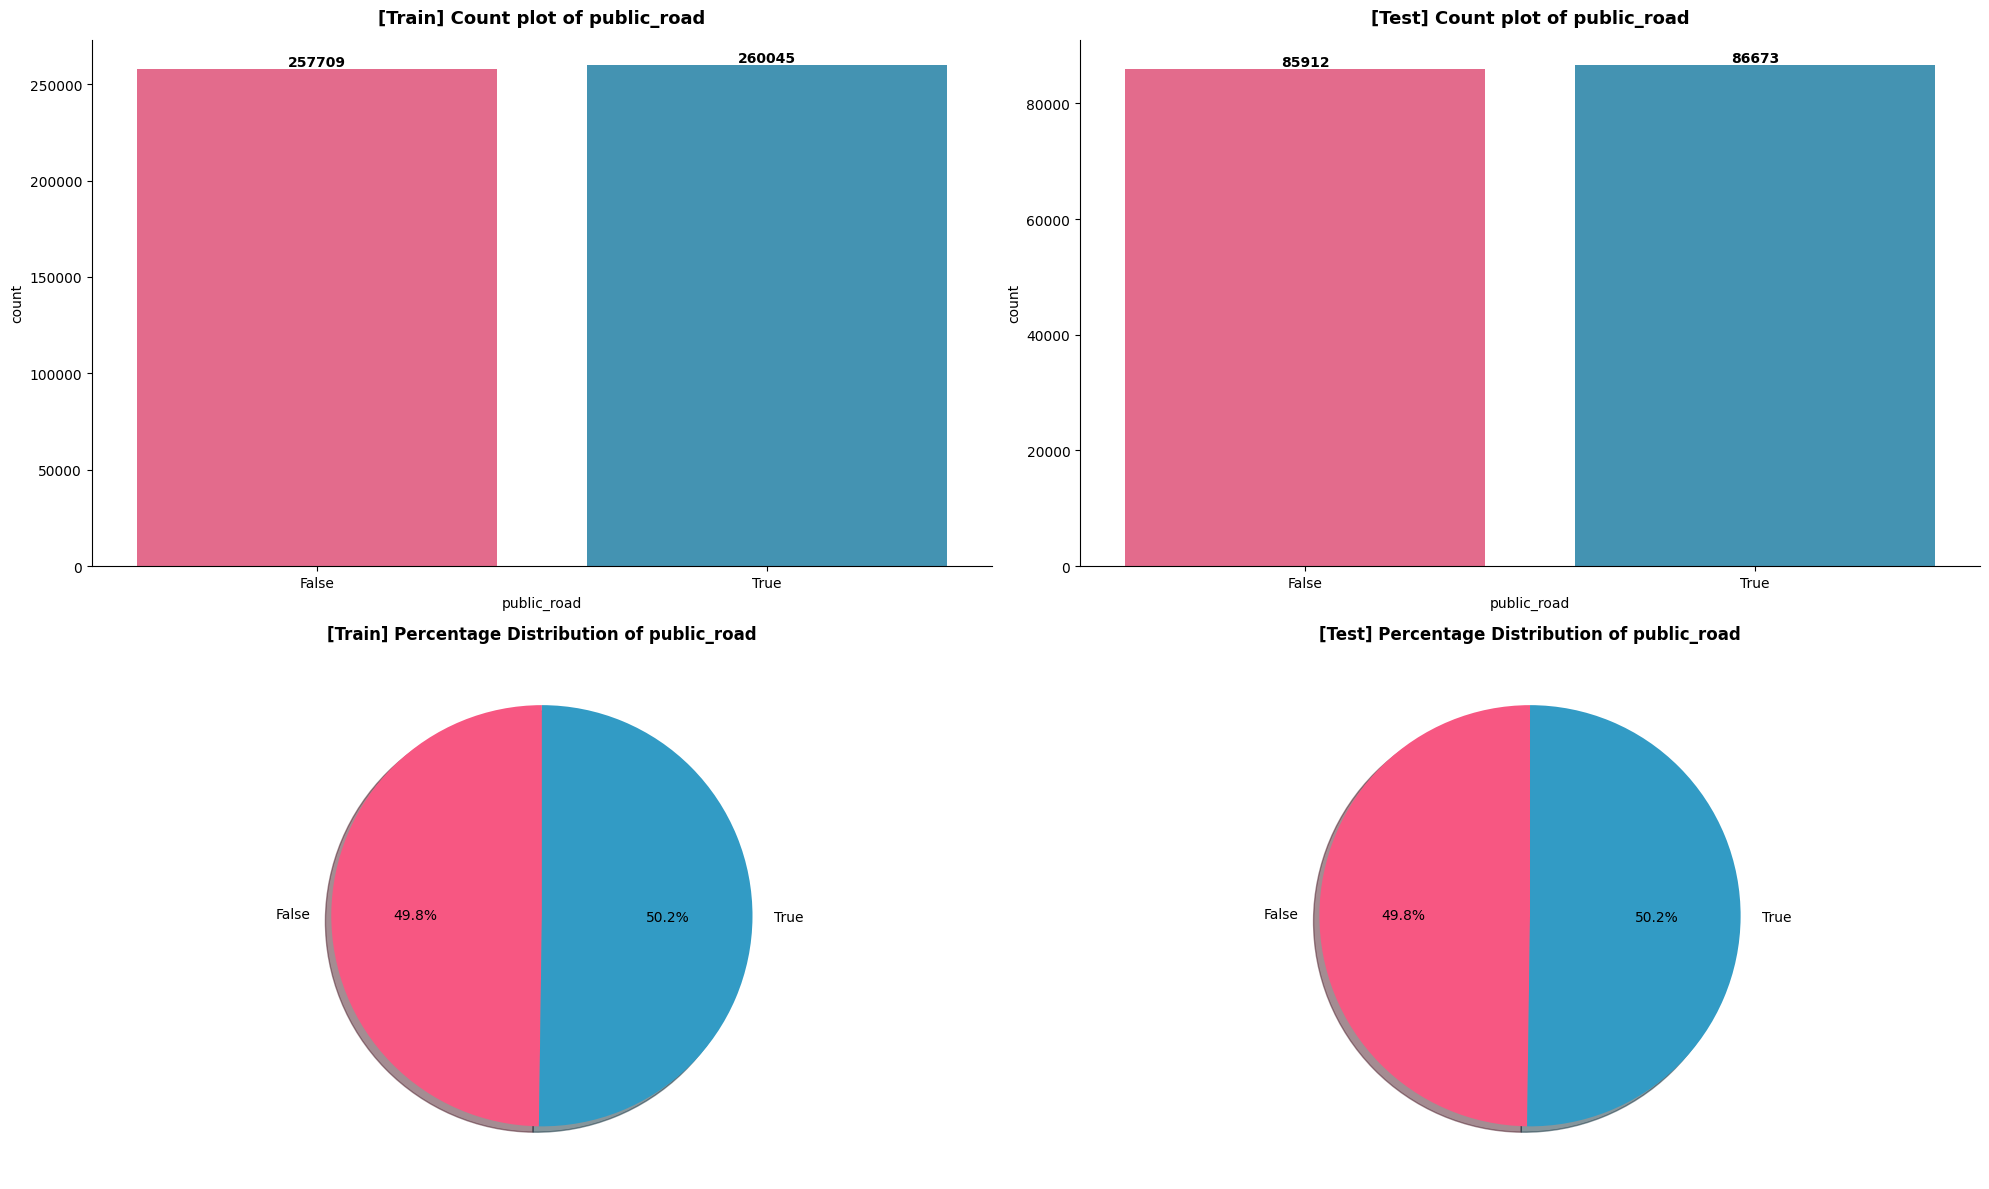

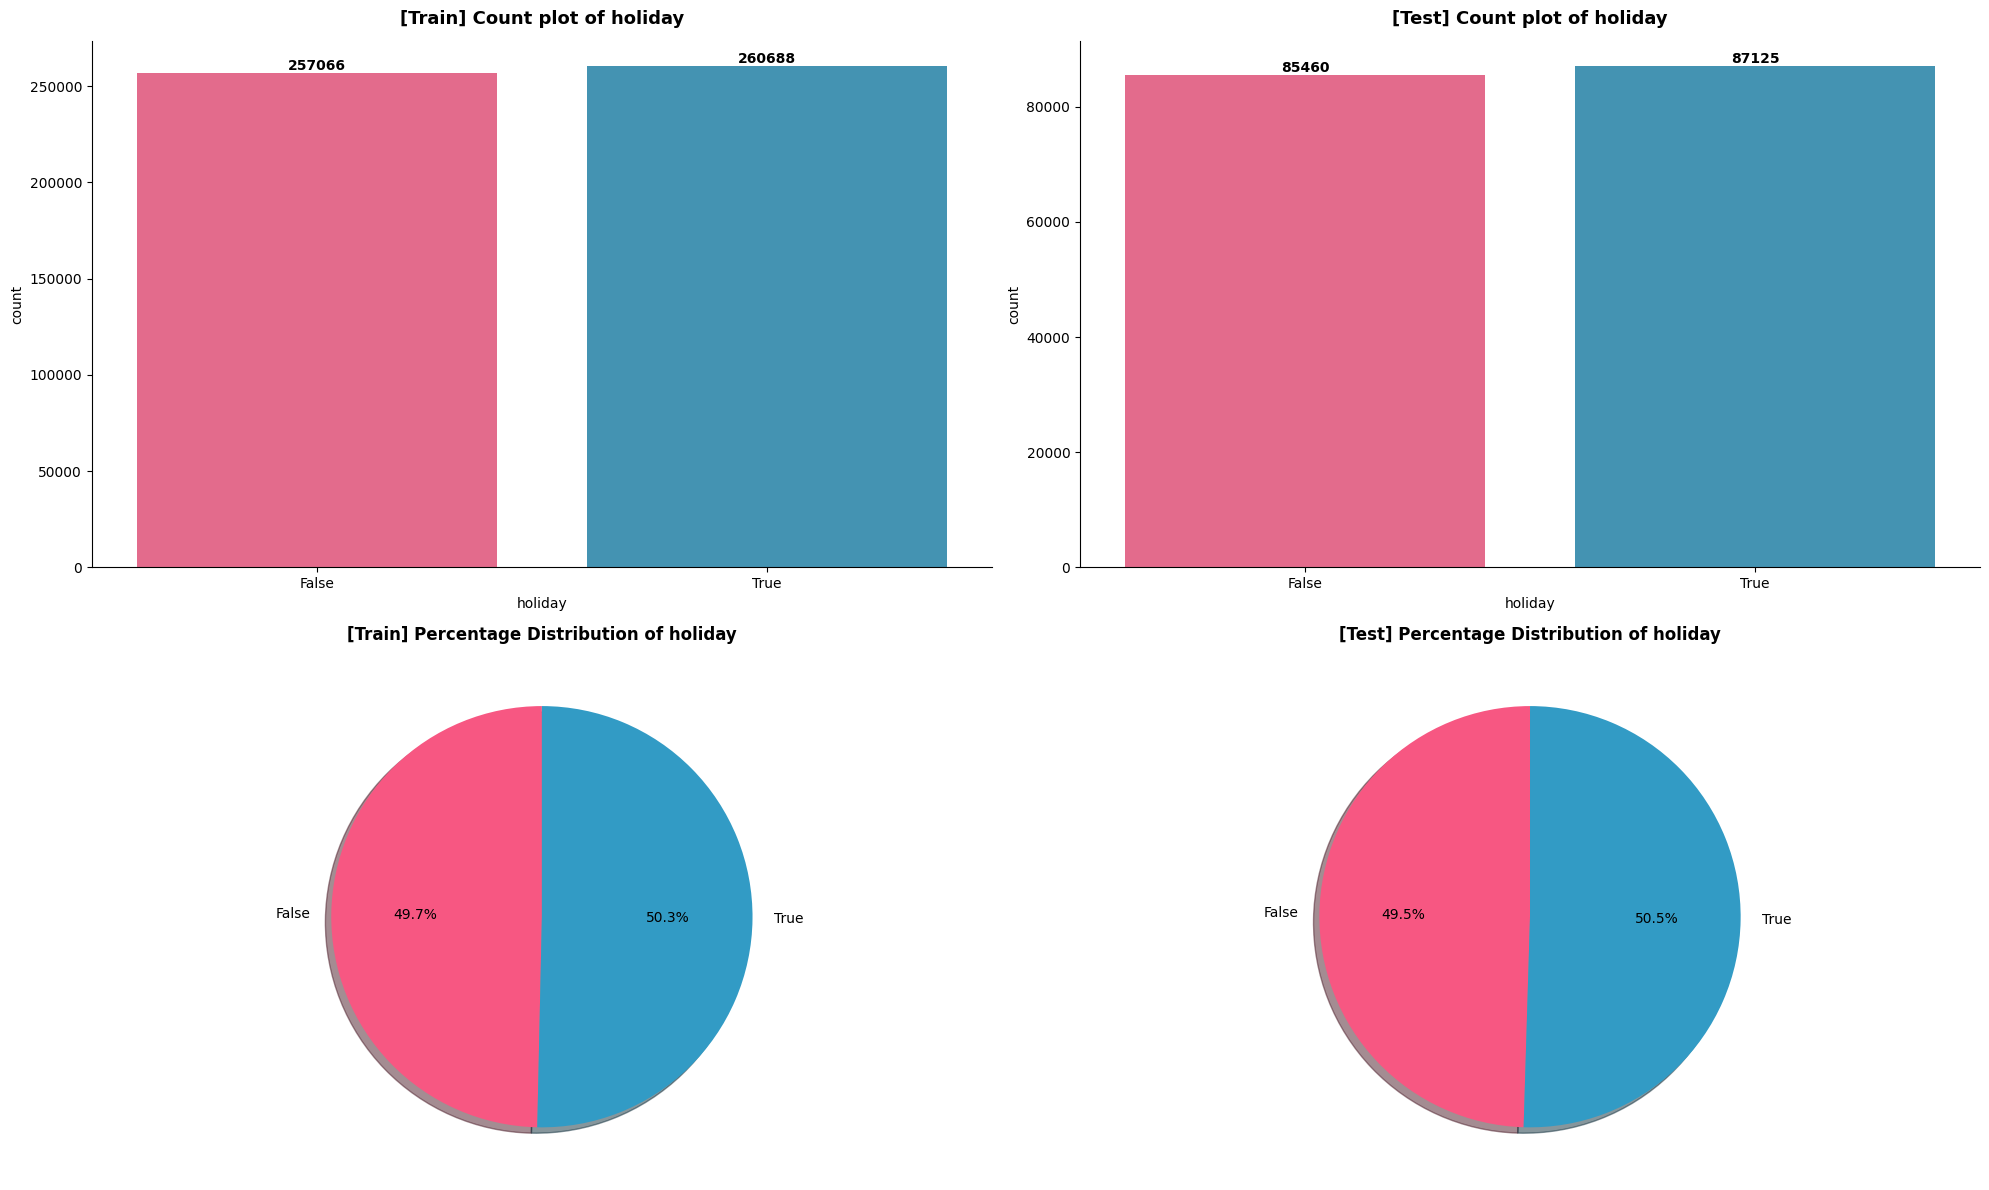

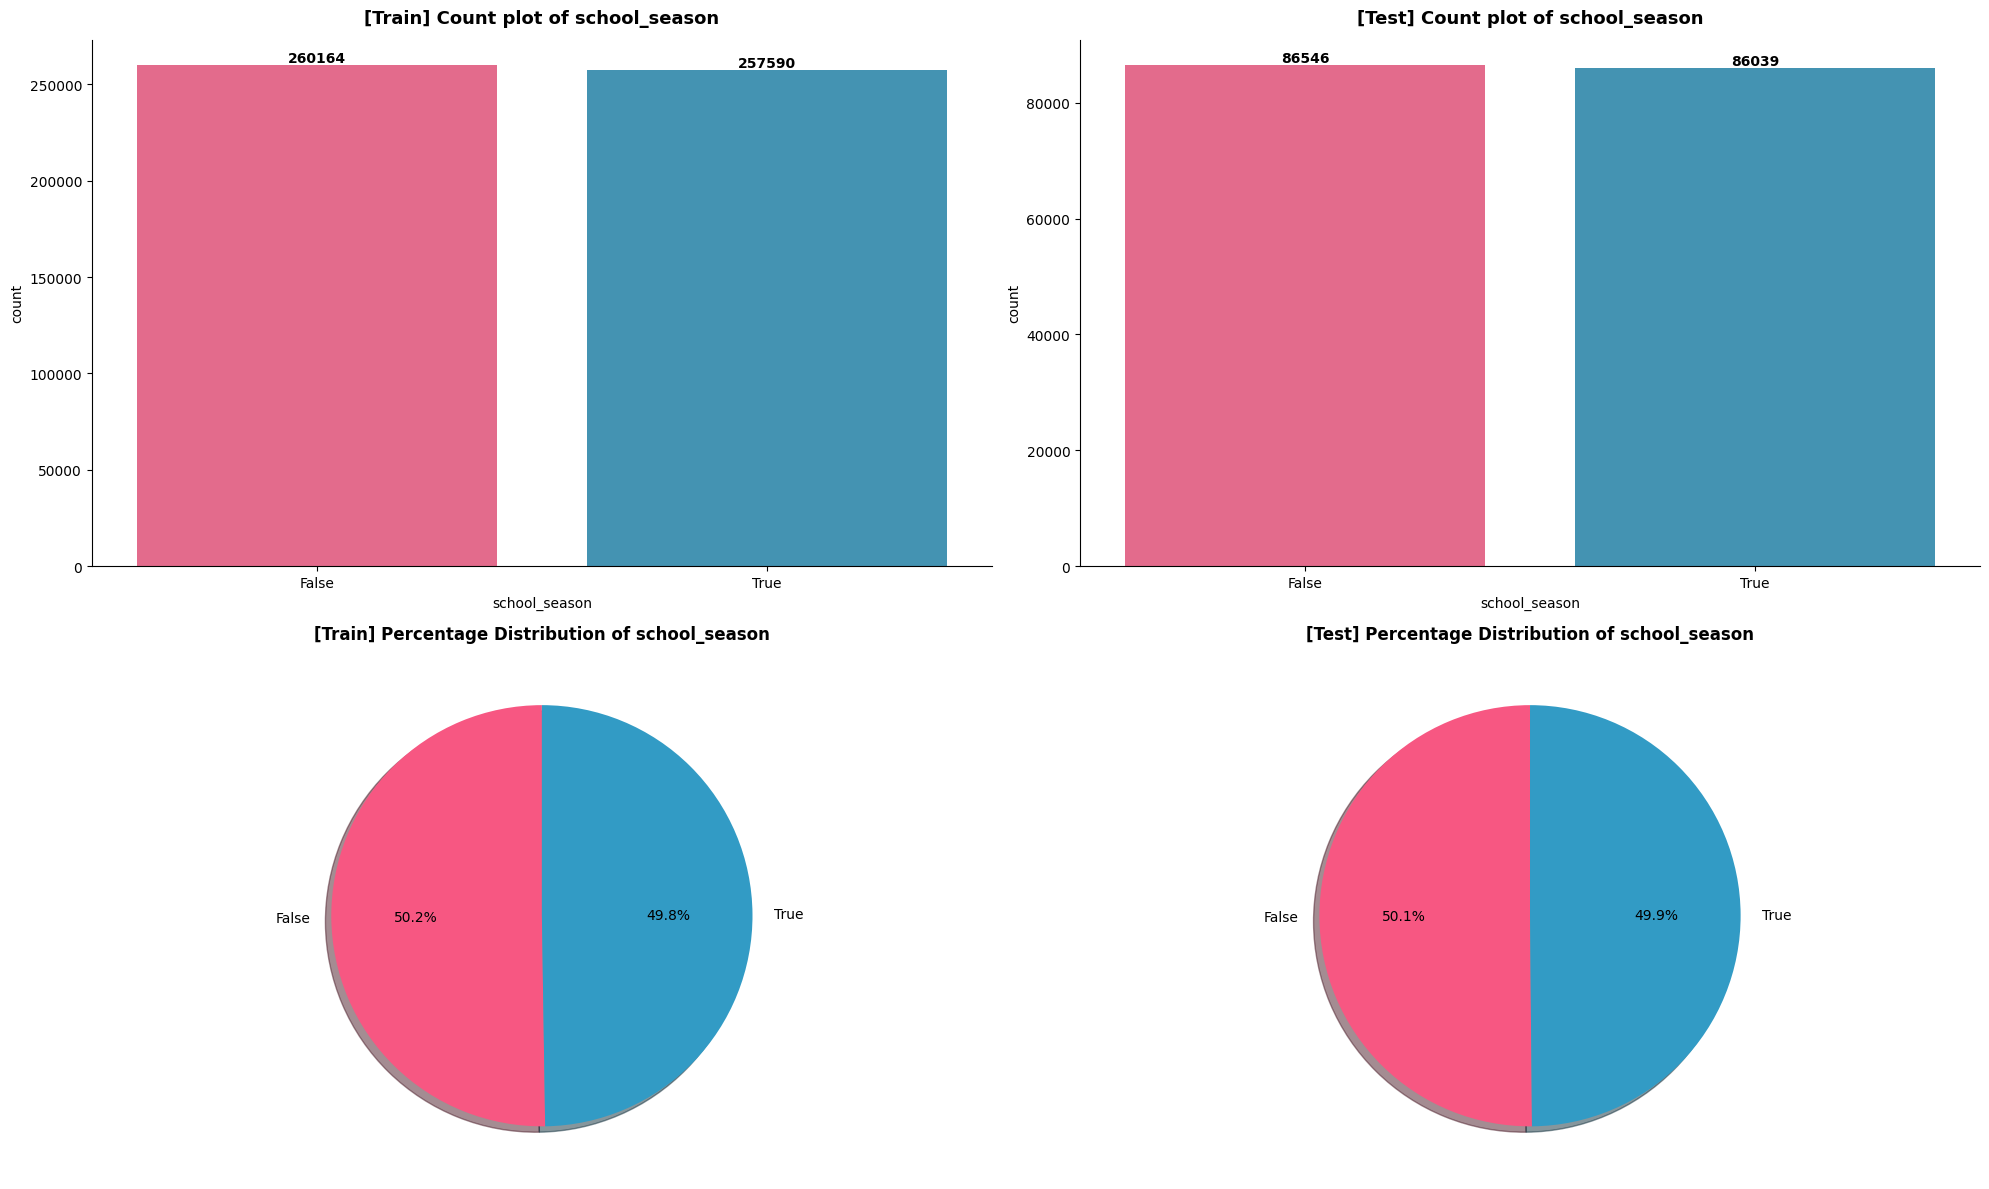

In [20]:
def plot_categorical_distribution(cat_features, df_train, df_test, order=None):
    for feature in cat_features:
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

        # Determine order dynamically if not provided
        if order is None:
            unique_vals = sorted(df_train[feature].dropna().unique())
        else:
            unique_vals = order

        # COUNT PLOT – TRAIN
        sns.countplot(data=df_train, x=feature, ax=ax[0, 0],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 0].set_title(f"[Train] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        # ax[0, 0].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 0], left=False, bottom=False)
        for container in ax[0, 0].containers:
            ax[0, 0].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # COUNT PLOT – TEST
        sns.countplot(data=df_test, x=feature, ax=ax[0, 1],
                      palette=color(n_colors=len(unique_vals)), order=unique_vals)
        ax[0, 1].set_title(f"[Test] Count plot of {feature}", fontsize=13, pad=12, weight="bold")
        # ax[0, 1].grid(axis="y", linestyle=":", linewidth=0.7)
        sns.despine(ax=ax[0, 1], left=False, bottom=False)
        for container in ax[0, 1].containers:
            ax[0, 1].bar_label(container, fmt='%d', label_type="edge", fontsize=10, weight="bold")

        # PIE CHART – TRAIN
        train_percent = df_train[feature].value_counts(normalize=True) * 100
        train_percent = train_percent.reindex(unique_vals).fillna(0)
        wedges, texts, autotexts = ax[1, 0].pie(train_percent.values, labels=train_percent.index,
                                                autopct='%1.1f%%', startangle=90, shadow= True,
                                                colors=color(n_colors=len(unique_vals)))
        ax[1, 0].set_title(f"[Train] Percentage Distribution of {feature}", pad=10, weight="bold")

        # PIE CHART – TEST
        test_percent = df_test[feature].value_counts(normalize=True) * 100
        test_percent = test_percent.reindex(unique_vals).fillna(0)
        wedges, texts, autotexts = ax[1, 1].pie(test_percent.values, labels=test_percent.index,
                                                autopct='%1.1f%%', startangle=90, shadow= True,
                                                colors=color(n_colors=len(unique_vals)))
        ax[1, 1].set_title(f"[Test] Percentage Distribution of {feature}", pad=10, weight="bold")

        plt.tight_layout()
        plt.show()

plot_categorical_distribution(cat_features=cat_features, df_train = df_train, df_test = df_test)

In [21]:
def top_ratio(df_test = df_test, df_train = df_train, cat_features = cat_features):
    dataset_names = ["Train", "Test"]
    datasets = [df_train, df_test]
    for i, (data, name) in enumerate(zip(datasets, dataset_names)):
        print(f"{name} Data")
        flagged = False
        for feature in cat_features:
            freq = data[feature].value_counts(normalize=True)
            top_ratio = freq.iloc[0]
            if top_ratio > 0.99:
                flagged = True
                print(f"⚠️  {feature}: {top_ratio:.1%} là '{freq.index[0]}'")
        if not flagged:
            print("✅ No feature has a category that makes up more than 99% of its values.")
        print("*" * 50)
top_ratio()

Train Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************
Test Data
✅ No feature has a category that makes up more than 99% of its values.
**************************************************


### Insights on Categorical Feature Distributions

**Consistency between Train and Test**

* Most categorical variables show **similar distributions** across train and test sets.
* Percentage differences are minimal (less than 1%), which means the data split is well balanced → reducing risks of data leakage or bias during training.

**Number of lanes (`num_lanes`)**

* Contains 4 values (1–4), distributed quite **evenly** (≈25% each).
* This variable is balanced and requires no special handling.

**Speed limit (`speed_limit`)**

* 5 levels: 25, 35, 45, 60, 70.
* Relatively balanced, but **45 mph is the most common (~22%)** and 70 mph the least (~17%).
* Still fairly stable, no severe skew.

**Number of reported accidents (`num_reported_accidents`)**

* Distribution is **uneven**:

  * 1 accident is the majority (~40.5%).
  * 2 accidents ~28.2%.
  * 0 accidents ~24.2%.
  * **Greater than 2** accidents is rare (~7.1%).
* This feature is somewhat **imbalanced**, especially for the `>2` group.

**Road type (`road_type`)**

* 3 categories: highway, rural, urban.
* Distribution is **very even** (about 33% each).
* Balanced feature.

**Lighting conditions (`lighting`)**

* Daylight (~34%), dim (~35%), night (~30%).
* Quite balanced, with slightly more in dim lighting.
* Suitable for modeling as is.

**Weather (`weather`)**

* Clear (~35%), foggy (~35%), rainy (~30%).
* Similar to lighting: relatively balanced.
* “Rainy” is a bit lower but still significant (~30%).

**Time of day (`time_of_day`)**

* 3 groups: morning, afternoon, evening.
* Extremely balanced (≈33% each).
* Perfect feature distribution.

**Binary variables**

* **road_signs_present**, **public_road**, **holiday**, **school_season**:

  * Nearly **50-50 split**.
  * Ideal balance, no skew.

**Overall conclusion**

* The dataset is generally **clean and well balanced** across most categorical variables.
* Only **`num_reported_accidents`** shows **clear imbalance** (majority at 1 accident, very few Greate than 2 accidents).
* Train/Test distributions are similar → the model can train stably with low risk of overfitting due to distributional mismatch.
* Categorical variables can be directly encoded (One-Hot, Target encoding, etc.) without additional balancing, except possibly handling the rare `num_reported_accidents >2` group.

## Bivariate Analysis

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'num_lanes' groups

 Group: 2 (n = 130054)
  Statistic : 2803.402
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 4 (n = 129118)
  Statistic : 3430.014
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 131168)
  Statistic : 2787.573
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 3 (n = 127414)
  Statistic : 2714.182
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ num_lanes
Kruskal-Wallis H-statistic: 268.509
p-value: 6.486222023079224e-58
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              1             2             3             4
1  1.000000e+00  3.863682e-03  1.788110e-17  1.342958e-12
2  3.863682e-03  1.000000e+00  6.714630e-07 

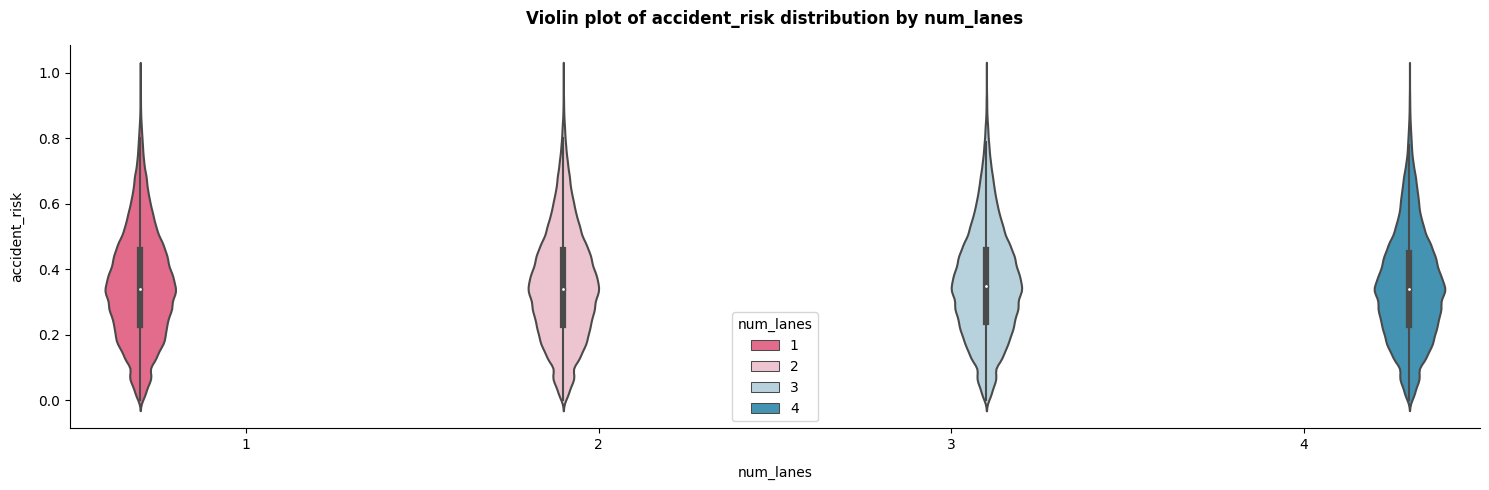

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'speed_limit' groups

 Group: 35 (n = 111628)
  Statistic : 2183.120
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 70 (n = 88648)
  Statistic : 2082.255
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 60 (n = 100304)
  Statistic : 1931.214
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 45 (n = 115752)
  Statistic : 1693.907
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 25 (n = 101422)
  Statistic : 1975.186
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ speed_limit
Kruskal-Wallis H-statistic: 120155.486
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
          25            

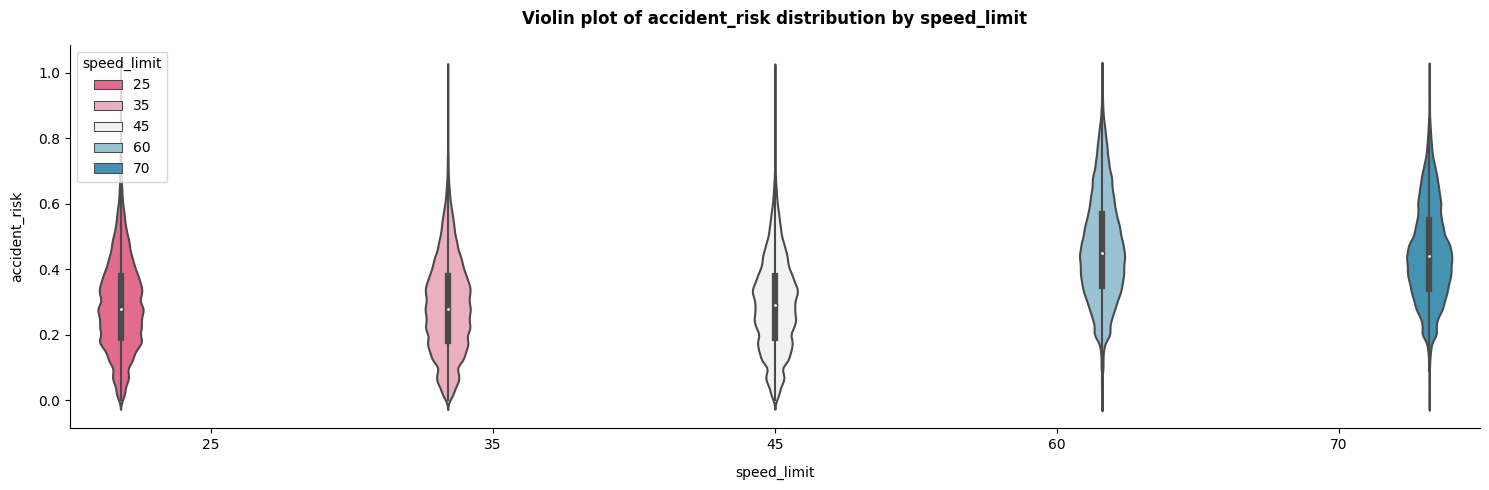

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'num_reported_accidents' groups

 Group: 1 (n = 209674)
  Statistic : 4172.203
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 0 (n = 125269)
  Statistic : 1953.873
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2 (n = 145965)
  Statistic : 2335.332
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Greater than 2 (n = 36846)
  Statistic : 275.161
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ num_reported_accidents
Kruskal-Wallis H-statistic: 49593.520
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                           0              1              2  Greater than 2
0               1.000000e+00   8.409438e-50   5.780663e-09      

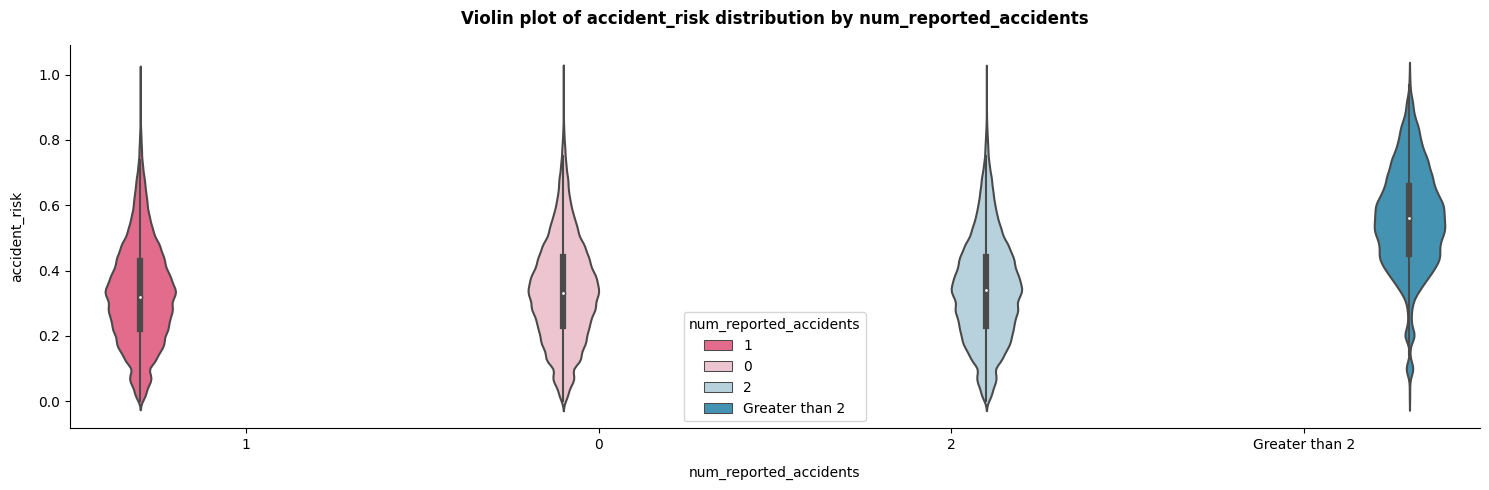

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'road_type' groups

 Group: urban (n = 171363)
  Statistic : 3523.391
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: rural (n = 172719)
  Statistic : 4360.500
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: highway (n = 173672)
  Statistic : 3883.823
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ road_type
Kruskal-Wallis H-statistic: 254.101
p-value: 6.647197704561443e-56
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              highway         rural         urban
highway  1.000000e+00  1.000000e+00  2.577501e-42
rural    1.000000e+00  1.000000e+00  1.440355e-43
urban    2.577501e-42  1.440355e-43  1.000000e+00


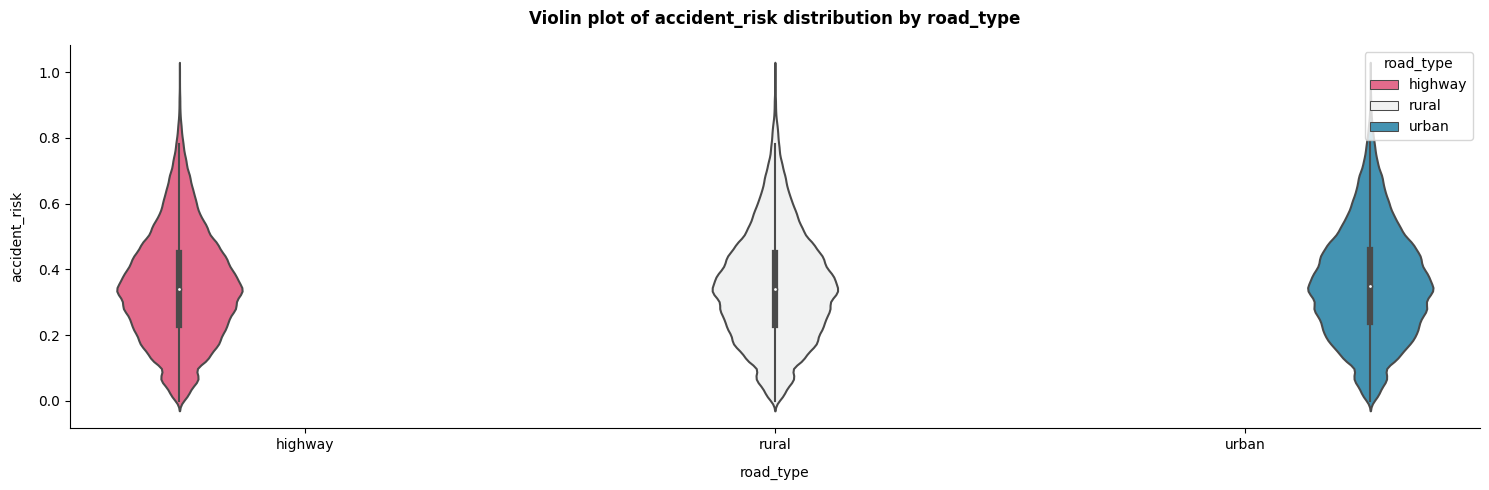

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'lighting' groups

 Group: daylight (n = 178015)
  Statistic : 2984.902
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: dim (n = 183826)
  Statistic : 2694.572
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: night (n = 155913)
  Statistic : 3949.277
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ lighting
Kruskal-Wallis H-statistic: 103891.146
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              daylight           dim  night
daylight  1.000000e+00  5.945433e-08    0.0
dim       5.945433e-08  1.000000e+00    0.0
night     0.000000e+00  0.000000e+00    1.0


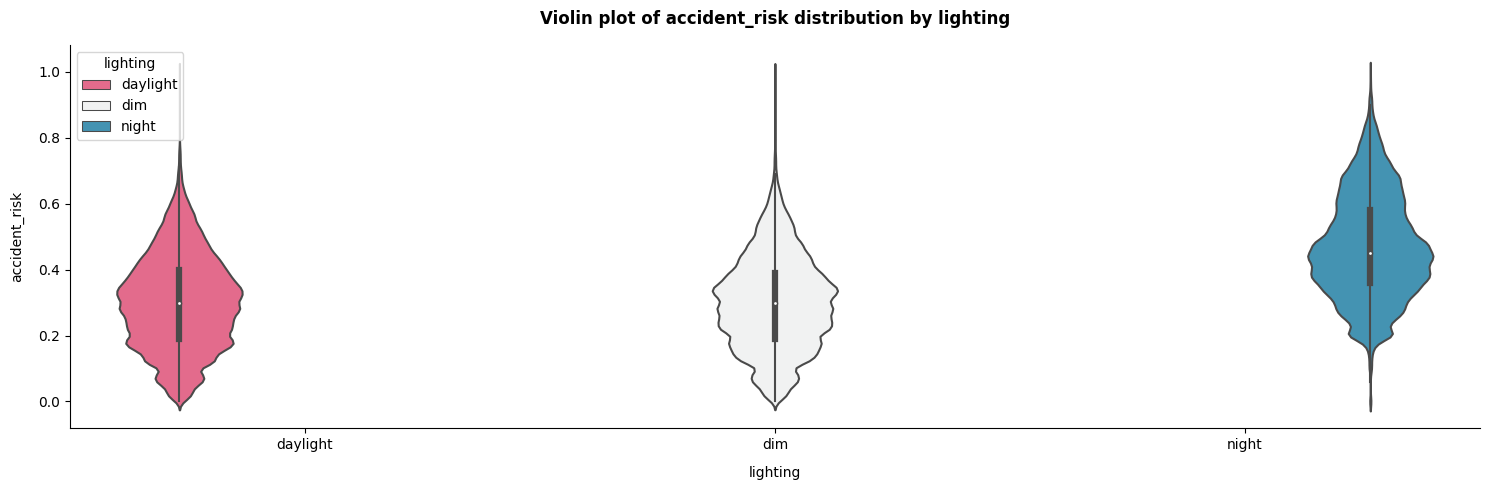

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'weather' groups

 Group: rainy (n = 156985)
  Statistic : 8299.030
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: clear (n = 179306)
  Statistic : 3747.183
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: foggy (n = 181463)
  Statistic : 4499.824
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ weather
Kruskal-Wallis H-statistic: 17453.649
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
       clear  foggy  rainy
clear    1.0    0.0    0.0
foggy    0.0    1.0    0.0
rainy    0.0    0.0    1.0


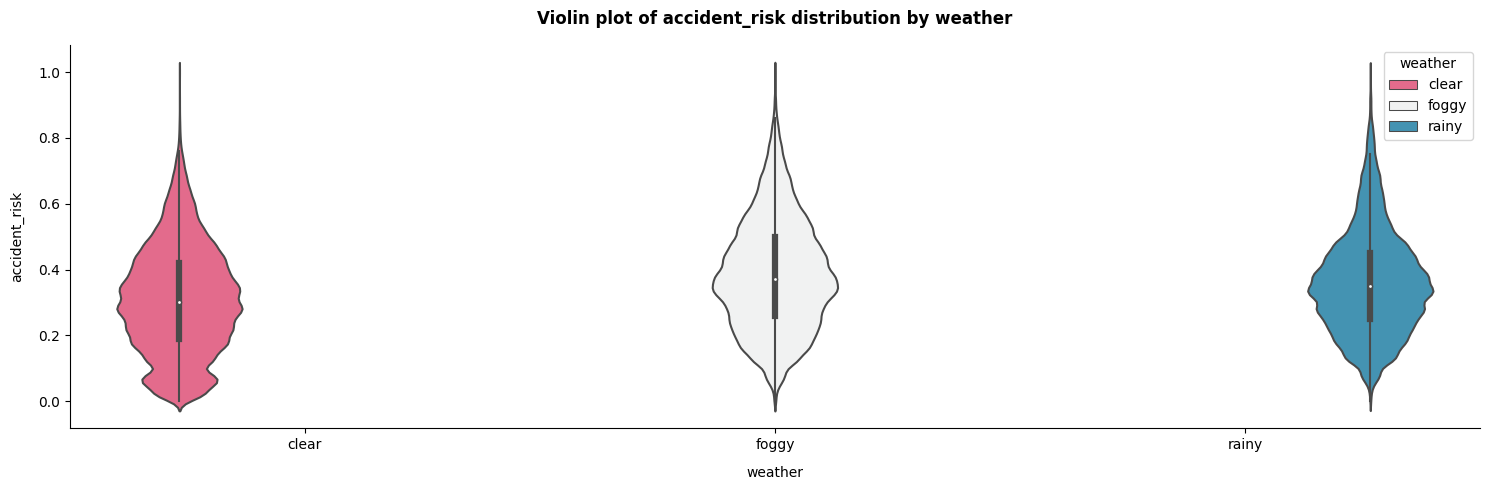

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'time_of_day' groups

 Group: afternoon (n = 171507)
  Statistic : 3789.937
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: evening (n = 172837)
  Statistic : 3888.784
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: morning (n = 173410)
  Statistic : 4061.163
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ time_of_day
Kruskal-Wallis H-statistic: 64.965
p-value: 7.816088575270912e-15
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
              afternoon       evening       morning
afternoon  1.000000e+00  1.048127e-09  6.655510e-01
evening    1.048127e-09  1.000000e+00  1.688356e-13
morning    6.655510e-01  1.688356e-13  1.000000e+00


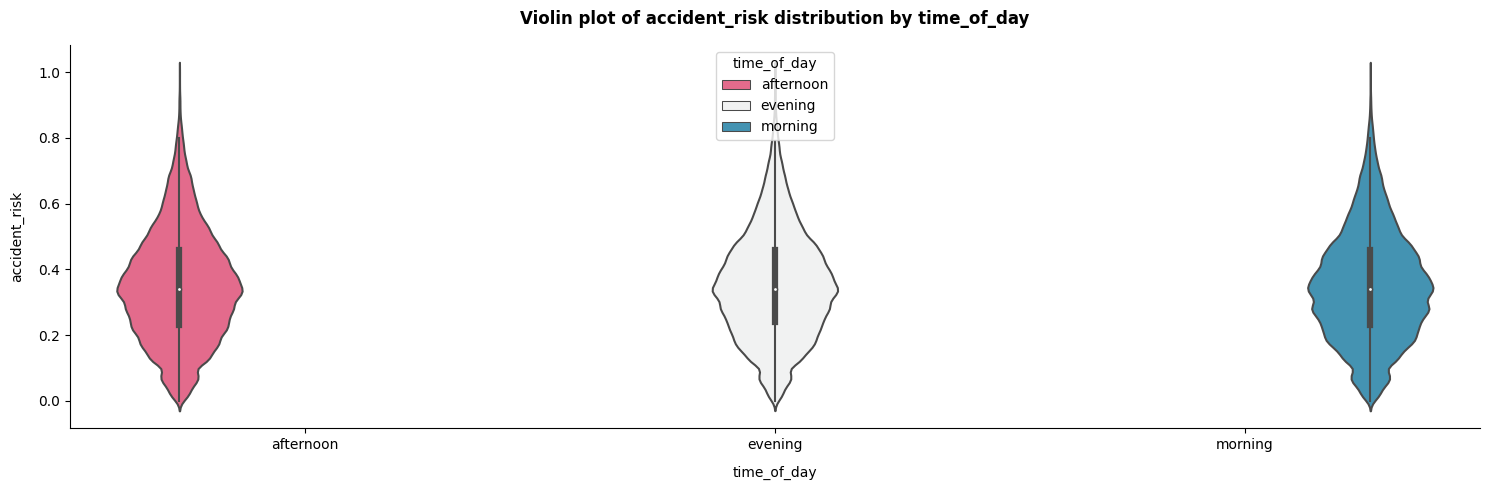

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'road_signs_present' groups

 Group: False (n = 259289)
  Statistic : 5741.699
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: True (n = 258465)
  Statistic : 5955.008
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'road_signs_present'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 33508222773.5
p-value     : 0.9949109284555306

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


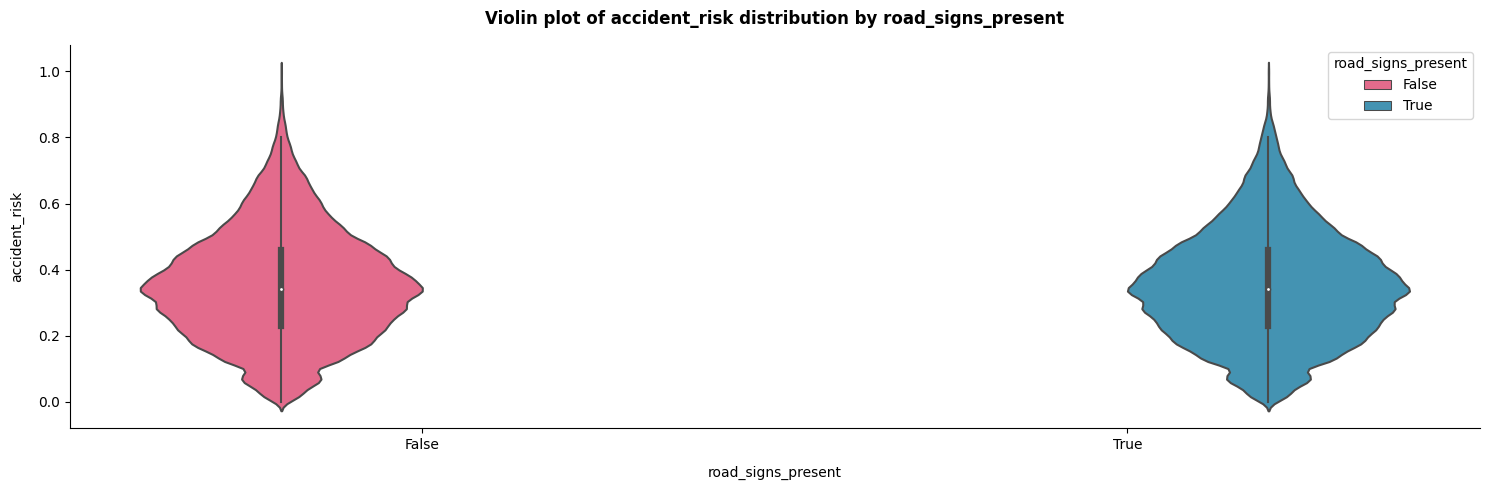

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'public_road' groups

 Group: True (n = 260045)
  Statistic : 5064.559
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: False (n = 257709)
  Statistic : 6824.484
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'public_road'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 34762235393.5
p-value     : 2.22870157014e-120

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'True' has a higher median 'accident_risk' than Group 'False'.


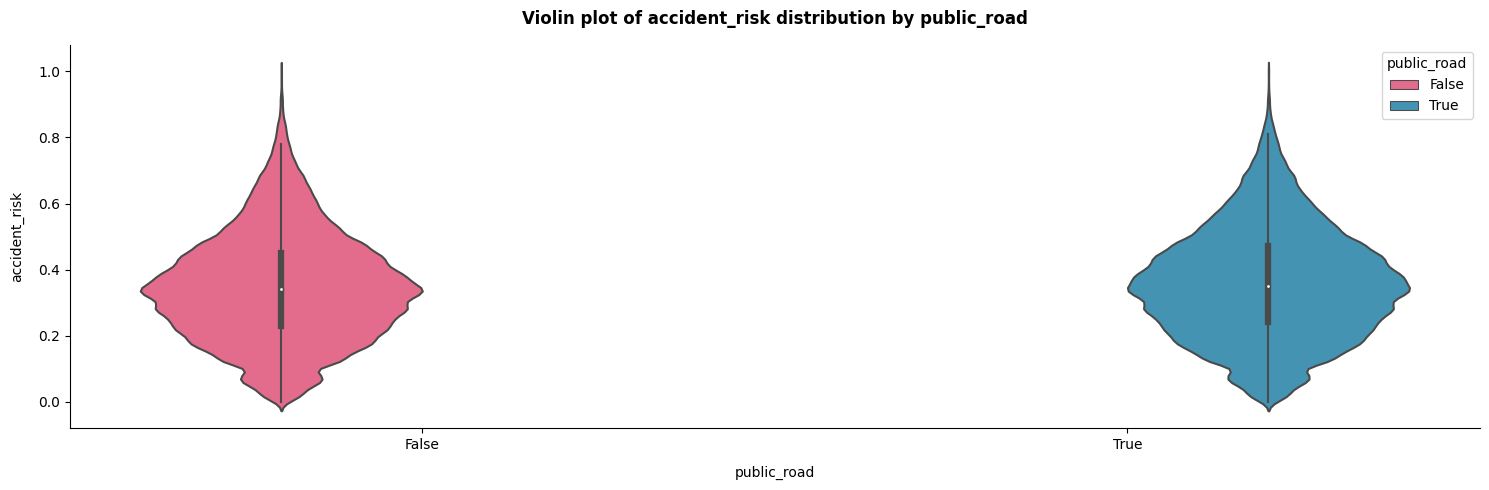

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'holiday' groups

 Group: False (n = 257066)
  Statistic : 7577.768
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: True (n = 260688)
  Statistic : 4550.693
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'holiday'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 31414648937.0
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'True' has a higher median 'accident_risk' than Group 'False'.


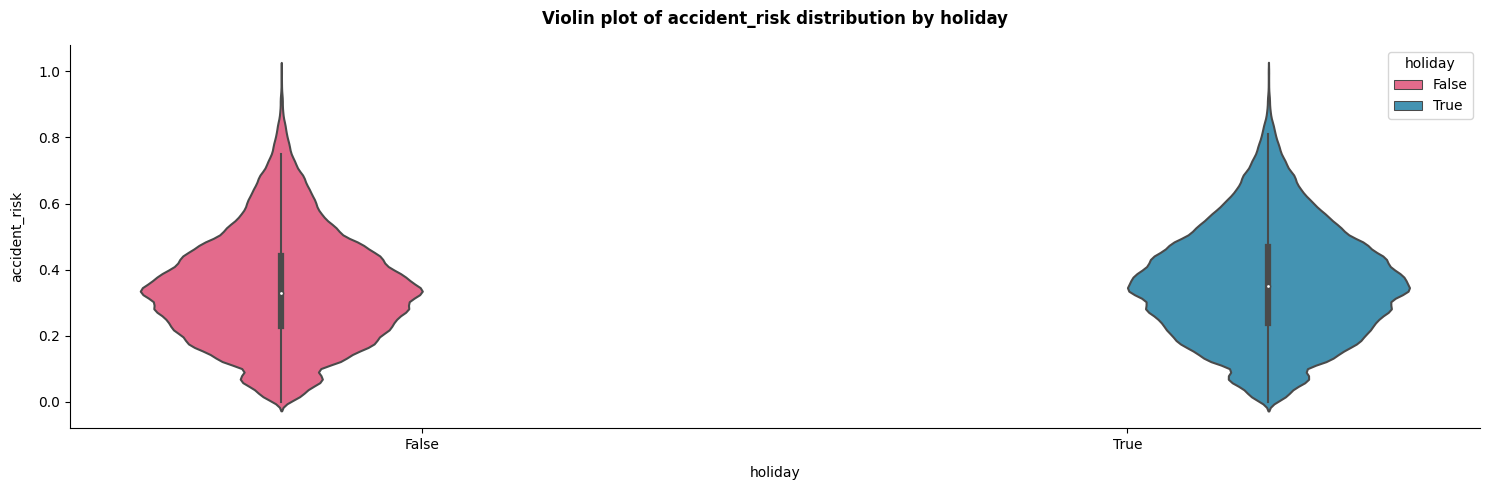

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'school_season' groups

 Group: True (n = 257590)
  Statistic : 5643.498
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: False (n = 260164)
  Statistic : 6054.047
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'school_season'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 33515717692.0
p-value     : 0.8832475730867478

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


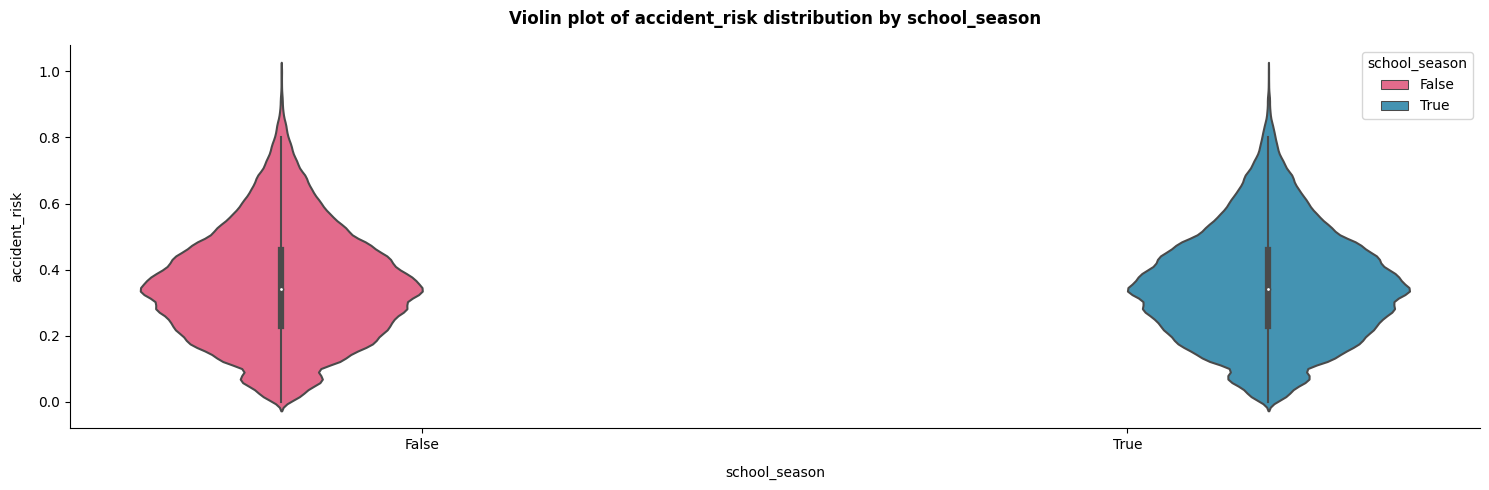

In [22]:
from IPython.core.display import HTML
target_feature = "accident_risk"
def perform_statical_testing(total_categories, feature, df_train = df_train, target_feature = target_feature):
    cal_normaltest(cat_feature=feature, num_feature=target_feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=feature, num_feature=target_feature)
    else:
        perform_kruskal_test(df=df_train, categorical_feature=feature, numeric_feature=target_feature)

def plot_categorical_distribution_by_target_feature(feature, df_train = df_train, target_feature = target_feature, order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violin and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the grouping variable (categorical).
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = feature, as_index= False)\
    .agg (
        Count = (target_feature, "count"),
        Mean_target_feature = (target_feature, "mean"),
        Median_target_feature = (target_feature, "median"),
        Std_target_feature = (target_feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)    

    summary_data = [
        ("Total Categories", f"{df_summary_feature.shape[0]}"),
        ("Overall Target Mean", f"{df_train[target_feature].mean():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(total_categories=df_summary_feature.shape[0], 
                             feature=feature, df_train=df_train, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x=feature, y=target_feature, data=df_train, hue=feature, 
                palette=color(n_colors=df_train[feature].nunique()), ax=ax)
    ax.set_title(f"Violin plot of {target_feature} distribution by {feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    # plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)

    plt.tight_layout()
    plt.show()

for feature in cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {target_feature} by {feature}</b></h2>"))
    plot_categorical_distribution_by_target_feature(feature=feature)

### Insight for Categorical Features by accident_risk

`num_lanes`

* Although accident risk does not vary dramatically across the number of lanes, the **statistical tests confirm small but significant differences**.
* Groups with **2 or 4 lanes** show slightly higher mean accident risk (~0.357) compared to 1 or 3 lanes (~0.351–0.353).
* Effect size appears **small**, but the large sample size makes differences statistically significant.

`speed_limit`

* **Accident risk increases sharply at higher speed limits (60–70 mph).**
* Lower speed limits (25–45 mph) maintain lower average risk (~0.29).
* The difference is not only statistically significant but also has **strong practical implications**: higher speed limits are clearly linked to higher accident risks.

`num_reported_accidents`

* **Accident history is a very strong predictor**: When reported accidents exceed 2, the **risk nearly doubles** compared to other groups.
* Groups 0–1–2 still differ statistically, but effect sizes are minor.

`road_type`

* **Urban roads show a slightly higher average accident risk** compared to rural and highway roads.
* While the mean differences are **small**, the large dataset makes these differences statistically significant.
* Highway and Rural are almost the same, while Urban stands out as a more notable factor

`lighting`

* **Night conditions are associated with much higher accident risk** compared to daylight or dim lighting.
* Daylight and dim are almost identical in terms of average risk.
* This suggests **lighting conditions are a strong factor in accident risk**, with nighttime being the most hazardous scenario.

`weather`

* Accident risk is **substantially higher in foggy conditions**, followed by rainy conditions.
* Clear weather has the lowest risk.
* Weather is a **critical factor** for accident risk, with **poor visibility (fog)** being the most hazardous condition.

`time_of_day`

* Accident risk is **slightly higher in the evening** compared to morning or afternoon.
* Morning and afternoon are nearly identical in terms of risk.
* Differences are statistically significant due to large sample size, but **practical impact is relatively small**.

`road_signs_present`

* The presence of road signs does **not significantly influence accident risk** in this dataset.

`public_road`

* Accident risk is **statistically higher on public roads** than on non-public roads.
* Even though the numerical difference in mean looks modest (~0.358 vs. 0.347), the very low p-value shows this effect is consistent across the dataset.
* This may reflect higher traffic volume, exposure, and variability of road conditions on public roads compared to private or restricted-access roads.

`holiday`

* Accident risk is **significantly higher during holidays** than on regular days.
* This finding is consistent across descriptive statistics, hypothesis testing, and distribution visualization.
* The results suggest that **holidays may be associated with heavier traffic volumes, long-distance travel, or more risky driving behaviors**, leading to an elevated accident risk.

`school_season`

* The presence of a **school season** does **not significantly impact accident risk** in this dataset.

**SUMMARY TABLE**

| Feature / Analysis Area    | Key Insights                                                                                                         | Statistical Significance                                                                                 | Practical Implication                                                                                  |
| -------------------------- | -------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **num_lanes**              | Accident risk shows **slight variation**: means ~0.351–0.357; highest at 3–4 lanes.                                  | Non-normal. Kruskal–Wallis **p≈6.5e-58**. Dunn: **some pairs significant**.                              | Lane count has **moderate impact**; keep as categorical feature.                                       |
| **speed_limit**            | Clear split: **higher speeds (60–70)** → higher risk (~0.45–0.47); **lower speeds (25–35–45)** → lower risk (~0.29). | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **most pairs significant**.                                  | Strong predictor; should be encoded. Policy: speed management crucial.                                 |
| **num_reported_accidents** | Strong effect: **>2 accidents → mean risk 0.56** vs **others ~0.33–0.34**.                                           | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **all pairs significant**.                                   | Very strong driver. Prior accident history is a key risk indicator.                                    |
| **road_type**              | Small but significant: **urban roads** slightly higher risk (~0.357) vs highway/rural (~0.349–0.350).                | Non-normal. Kruskal–Wallis **p≈6.6e-56**. Dunn: **urban > rural/highway**.                               | Urban settings pose higher risk; should be retained.                                                   |
| **lighting**               | Strong impact: **night risk highest (0.47)** vs **daylight/dim (~0.30)**.                                            | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **all pairs significant**.                                   | Critical predictor. Night-time driving is much riskier → policy/actionable insight.                    |
| **weather**                | Higher risk in **fog (0.386) and rain (0.361)** vs **clear (0.310)**.                                                | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **all pairs significant**.                                   | Weather is a strong contextual factor. Keep in model.                                                  |
| **time_of_day**            | Very small differences: means ~0.351–0.355. Evening slightly higher.                                                 | Non-normal. Kruskal–Wallis **p≈7.8e-13**. Dunn: **evening vs others significant** but effect size small. | Weak predictor; may interact with lighting.                                                            |
| **road_signs_present**     | **No meaningful difference alone**: both ~0.352.                                                                     | Non-normal. Mann–Whitney **p≈0.995**.                                                                    | Alone not predictive, but may be useful in **interactions** (e.g., signs × speed, signs × road_type).  |
| **public_road**            | **Public roads slightly higher risk (0.358)** vs private (0.347).                                                    | Non-normal. Mann–Whitney **p≈2.2e-120**. Significant.                                                    | Public roads inherently riskier due to exposure. Keep as binary feature.                               |
| **holiday**                | Accident risk **higher on holidays (0.361)** vs non-holidays (0.344).                                                | Non-normal. Mann–Whitney **p≈0.0**. Significant.                                                         | Useful signal. Risk rises on holidays, perhaps due to more traffic/fatigue.                            |
| **school_season**          | **No difference alone**: both ~0.352.                                                                                | Non-normal. Mann–Whitney **p≈0.883**.                                                                    | Not predictive alone, but may **interact** with `time_of_day`, `holiday`, or `road_type`. Keep for ML. |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Feature Engineering

In [23]:
# high_risk_condition
def classify_high_risk(row):
    if row["speed_limit"] >= 60 and row["weather"] in ["foggy", "rainy"]:
        return "High risk"
    return "Normal risk"

df_train["high_risk_condition"] = df_train.apply(classify_high_risk, axis=1)
df_test["high_risk_condition"] = df_test.apply(classify_high_risk, axis=1)

# expected_light_condition
def check_expected_light(row):
    if row["time_of_day"] in ["morning", "afternoon"] and row["lighting"] != "daylight":
        return "unexpected"
    elif row["time_of_day"] == "evening" and row["lighting"] not in ["dim", "night"]:
        return "unexpected"
    else:
        return "expected"

df_train["expected_light_condition"] = df_train.apply(check_expected_light, axis=1)
df_test["expected_light_condition"] = df_test.apply(check_expected_light, axis=1)

# holiday_public_risk
def check_holiday_public(row):
    if row["holiday"] == True and row["public_road"] == True:
        return "holiday_public"
    elif row["holiday"] == True and row["public_road"] == False:
        return "holiday_private"
    else:
        return "non_holiday"

df_train["holiday_public_risk"] = df_train.apply(check_holiday_public, axis=1)
df_test["holiday_public_risk"] = df_test.apply(check_holiday_public, axis=1)

# school_rush_hour_risk
def check_school_rush_hour(row):
    if row["school_season"] == True and row["time_of_day"] in ["morning", "afternoon"]:
        return "school_rush_hour"
    else:
        return "normal"

df_train["school_rush_hour_risk"] = df_train.apply(check_school_rush_hour, axis=1)
df_test["school_rush_hour_risk"] = df_test.apply(check_school_rush_hour, axis=1)

# Holiday night: holiday + night time
def check_holiday_night(row):
    if row["holiday"] == True and row["lighting"] == "night":
        return "Yes"
    else:
        return "No"

df_train["is_holiday_night"] = df_train.apply(check_holiday_night, axis=1)
df_test["is_holiday_night"] = df_test.apply(check_holiday_night, axis=1)

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'high_risk_condition' groups

 Group: Normal risk (n = 403958)
  Statistic : 7212.694
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: High risk (n = 113796)
  Statistic : 3251.777
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'high_risk_condition'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 9233608157.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'High risk' has a higher median 'accident_risk' than Group 'Normal risk'.


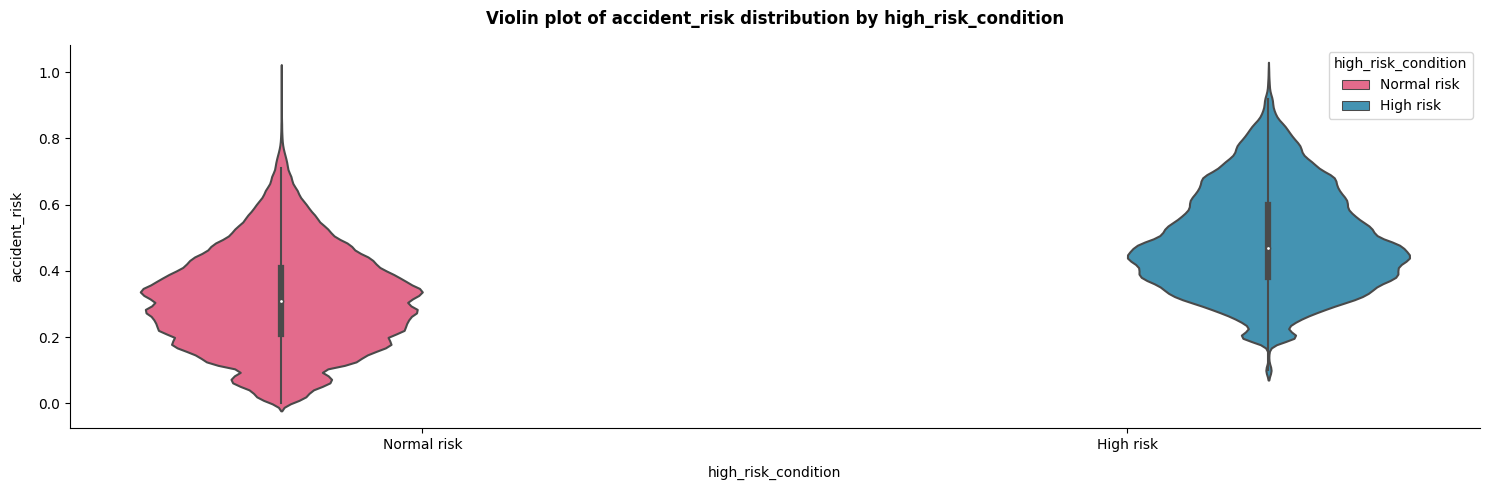

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'expected_light_condition' groups

 Group: expected (n = 232020)
  Statistic : 5390.333
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: unexpected (n = 285734)
  Statistic : 6073.619
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'expected_light_condition'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 30735458848.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'unexpected' has a higher median 'accident_risk' than Group 'expected'.


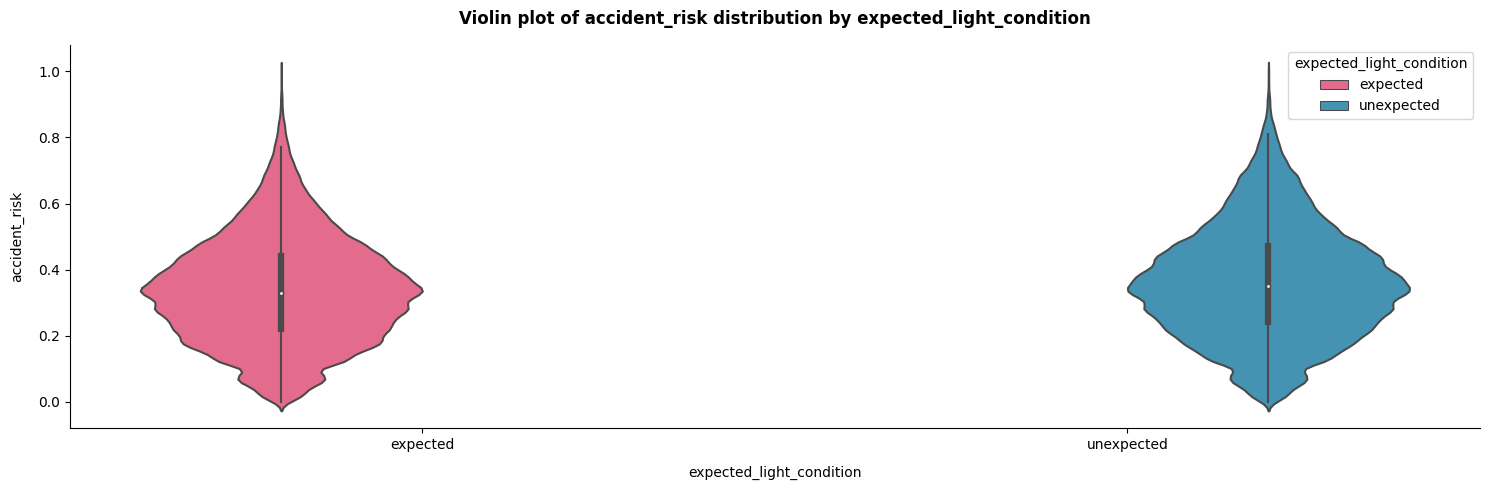

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'holiday_public_risk' groups

 Group: non_holiday (n = 257066)
  Statistic : 7577.768
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: holiday_private (n = 130781)
  Statistic : 2562.655
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: holiday_public (n = 129907)
  Statistic : 2064.252
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: accident_risk ~ holiday_public_risk
Kruskal-Wallis H-statistic: 1673.015
p-value: 0.0
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
                 holiday_private  holiday_public    non_holiday
holiday_private     1.000000e+00    7.758986e-36  2.478243e-133
holiday_public      7.758986e-36    1.000000e+00   0.000000e+00
non_holiday        2.478243e-133    0.000000e+00   1.000000e+00


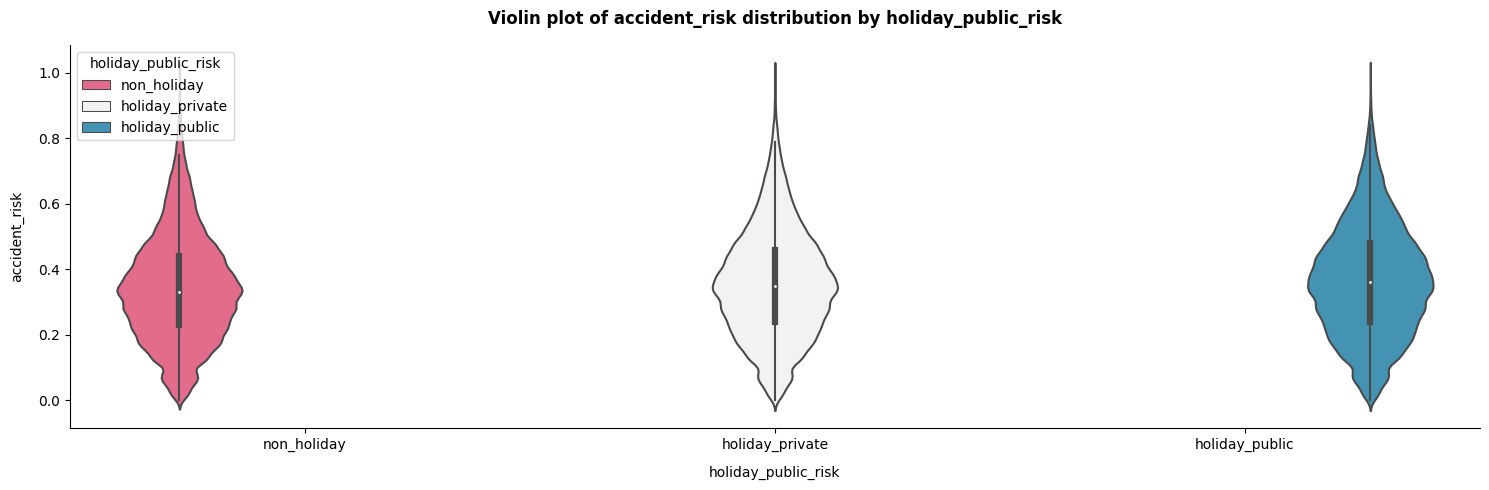

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'school_rush_hour_risk' groups

 Group: school_rush_hour (n = 172341)
  Statistic : 3741.888
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: normal (n = 345413)
  Statistic : 7973.121
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'school_rush_hour_risk'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 29588260527.5
p-value     : 0.0005082898655836581

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: The medians are equal, but distributions may still differ.


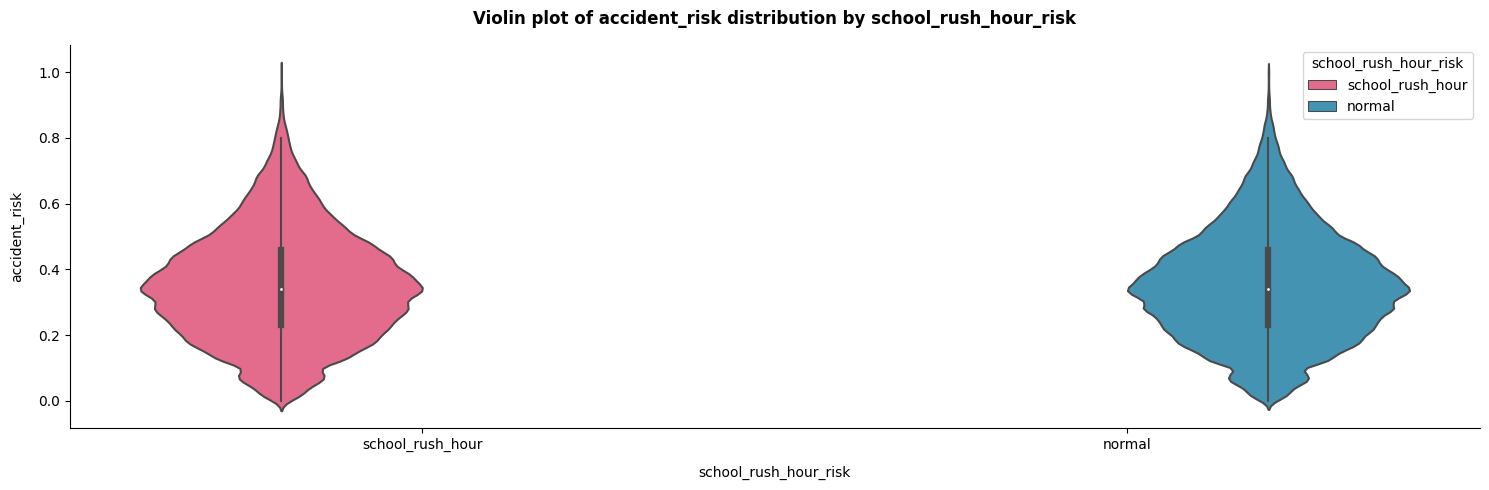

🔎 D’Agostino and Pearson Normality Test for 'accident_risk' across 'is_holiday_night' groups

 Group: No (n = 437236)
  Statistic : 10496.357
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: Yes (n = 80518)
  Statistic : 1753.695
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'accident_risk' by 'is_holiday_night'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 8954967772.5
p-value     : 0.0

✅ Result: Statistically significant difference between the two groups (Reject H₀).
 Interpretation: Group 'Yes' has a higher median 'accident_risk' than Group 'No'.


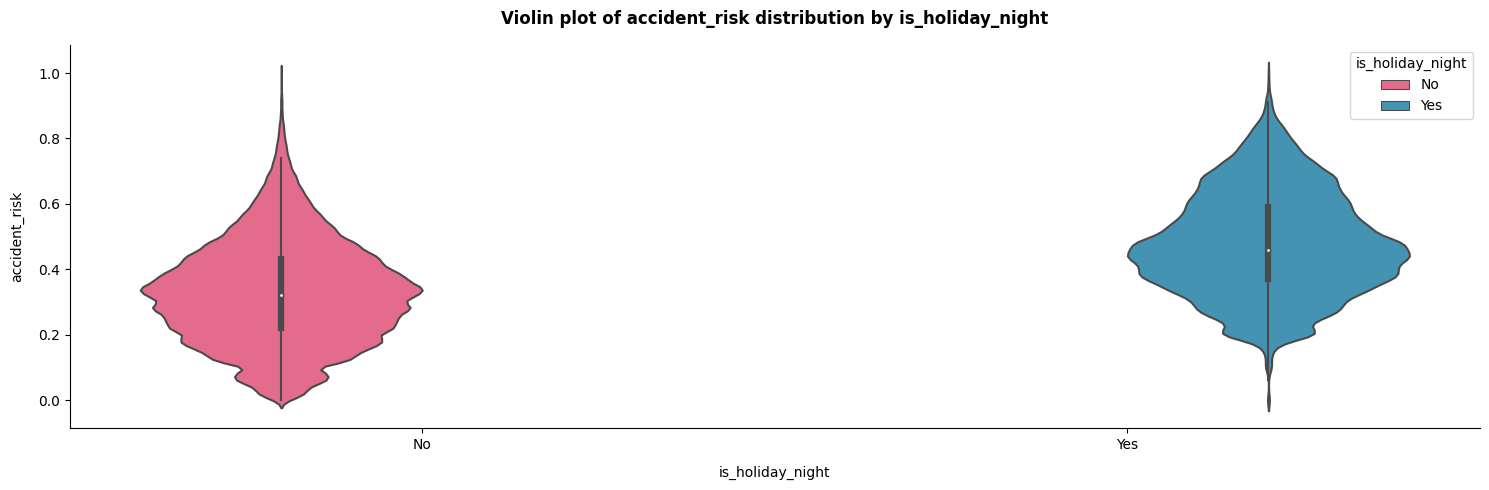

In [24]:
new_cat_features = ["high_risk_condition", "expected_light_condition", "holiday_public_risk", "school_rush_hour_risk", 
                    "is_holiday_night"]
for feature in new_cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {target_feature} by {feature}</b></h2>"))
    plot_categorical_distribution_by_target_feature(feature=feature)

### Insight new features

`high_risk_condition`

* The **`high_risk_condition`** feature is a **strong predictor** of accident risk.
* Driving at **high speed in foggy/rainy weather** clearly increases accident risk compared to normal conditions.
* This engineered feature captures meaningful interactions and should be kept in the model.

`expected_light_condition`

* Unexpected lighting conditions (e.g., dim in the morning, daylight at night) **significantly increase accident risk** compared to expected conditions.
* This suggests that **lighting mismatches with time-of-day** may create confusion or reduce visibility, contributing to higher accident risk.

`holiday_public_risk`

* Accident risk is **significantly higher during holidays**, especially on **public holidays on public roads**.
* Both statistical tests and visualization confirm this.
* **Public gatherings, traffic surges, and festive driving behavior** may contribute to the increased accident risk.

`school_rush_hour_risk`

* **Accident risk does not increase during school rush hour**; in fact, it’s **very slightly lower** on average.
* The statistical test confirms a **real but very small difference**, which is more about distributional shape than average risk.
* Practically, **school rush hour may not be a strong predictor** of accident risk compared to other variables (e.g., holiday effect, traffic type, weather).

`is_holiday_night`

* Accident risk is **significantly higher during holiday nights**.
* Both statistical and visual evidence confirm this finding.
* This feature (`is_holiday_night`) is a **strong predictor** of accident risk and should be emphasized in modeling.
* Practical implication: **Holiday night traffic management (e.g., alcohol checks, increased patrols, lighting improvements)** could be critical in reducing risks.

**SUMMARY TABLE**

| Feature / Analysis Area      | Key Insights                                                                                                         | Statistical Significance                                                                                 | Practical Implication                                                                                  |
| ---------------------------- | -------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **num_lanes**                | Accident risk shows **slight variation**: means ~0.351–0.357; highest at 3–4 lanes.                                  | Non-normal. Kruskal–Wallis **p≈6.5e-58**. Dunn: **some pairs significant**.                              | Lane count has **moderate impact**; keep as categorical feature.                                       |
| **speed_limit**              | Clear split: **higher speeds (60–70)** → higher risk (~0.45–0.47); **lower speeds (25–35–45)** → lower risk (~0.29). | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **most pairs significant**.                                  | Strong predictor; should be encoded. Policy: speed management crucial.                                 |
| **num_reported_accidents**   | Strong effect: **>2 accidents → mean risk 0.56** vs **others ~0.33–0.34**.                                           | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **all pairs significant**.                                   | Very strong driver. Prior accident history is a key risk indicator.                                    |
| **road_type**                | Small but significant: **urban roads** slightly higher risk (~0.357) vs highway/rural (~0.349–0.350).                | Non-normal. Kruskal–Wallis **p≈6.6e-56**. Dunn: **urban > rural/highway**.                               | Urban settings pose higher risk; should be retained.                                                   |
| **lighting**                 | Strong impact: **night risk highest (0.47)** vs **daylight/dim (~0.30)**.                                            | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **all pairs significant**.                                   | Critical predictor. Night-time driving is much riskier → policy/actionable insight.                    |
| **weather**                  | Higher risk in **fog (0.386) and rain (0.361)** vs **clear (0.310)**.                                                | Non-normal. Kruskal–Wallis **p≈0.0**. Dunn: **all pairs significant**.                                   | Weather is a strong contextual factor. Keep in model.                                                  |
| **time_of_day**              | Very small differences: means ~0.351–0.355. Evening slightly higher.                                                 | Non-normal. Kruskal–Wallis **p≈7.8e-13**. Dunn: **evening vs others significant** but effect size small. | Weak predictor; may interact with lighting.                                                            |
| **road_signs_present**       | **No meaningful difference alone**: both ~0.352.                                                                     | Non-normal. Mann–Whitney **p≈0.995**.                                                                    | Alone not predictive, but may be useful in **interactions** (e.g., signs × speed, signs × road_type).  |
| **public_road**              | **Public roads slightly higher risk (0.358)** vs private (0.347).                                                    | Non-normal. Mann–Whitney **p≈2.2e-120**. Significant.                                                    | Public roads inherently riskier due to exposure. Keep as binary feature.                               |
| **holiday**                  | Accident risk **higher on holidays (0.361)** vs non-holidays (0.344).                                                | Non-normal. Mann–Whitney **p≈0.0**. Significant.                                                         | Useful signal. Risk rises on holidays, perhaps due to more traffic/fatigue.                            |
| **school_season**            | **No difference alone**: both ~0.352.                                                                                | Non-normal. Mann–Whitney **p≈0.883**.                                                                    | Not predictive alone, but may **interact** with `time_of_day`, `holiday`, or `road_type`. Keep for ML. |
| **high_risk_condition**      | Engineered feature. Strong predictor: **high speed + bad weather** → clearly higher risk.                            | Non-normal. Strongly significant.                                                                        | Very valuable feature capturing interactions.                                                          |
| **expected_light_condition** | **Unexpected lighting mismatch** increases risk vs expected light.                                                   | Non-normal. Statistically significant.                                                                   | Suggests context-aware modeling; can help detect unusual, risky situations.                            |
| **holiday_public_risk**      | **Highest risk on public holidays on public roads** > private holidays > non-holidays.                               | Non-normal. Kruskal–Wallis **p≈0.0**, Dunn confirms pairwise differences.                                | Clear ranking → strong holiday effect. Important for feature engineering.                              |
| **school_rush_hour_risk**    | **No meaningful increase**; slightly lower risk during school rush hours.                                            | Non-normal. Mann–Whitney **p≈0.00058** (significant but effect size very small).                         | Weak standalone predictor; better as interaction feature.                                              |
| **is_holiday_night**         | **Holiday nights much riskier** (Mean 0.477 vs 0.329).                                                               | Non-normal. Mann–Whitney **p≈0.0**.                                                                      | Strong predictor. Policy: alcohol checks, patrols, lighting improvements on holiday nights.            |


## Create Test Set

🔴 Suppose you chatted with experts who told you that the **high_risk_condition** is a very important attribute to predict **accident_risk**.

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_train, df_train["high_risk_condition"]):
    start_train_set = df_train.iloc[train_index]
    start_val_set = df_train.iloc[test_index]

## Scale and Encode

In [26]:
df_train_new = start_train_set.drop("accident_risk", axis=1)
df_train_label_new = start_train_set["accident_risk"].copy()

In [27]:
list_feature_num_stand = ["curvature"]
list_feature_cat_onehot = ["num_lanes", "speed_limit", "num_reported_accidents", "road_type", "lighting", "weather", "time_of_day", "road_signs_present", "public_road", "holiday",
                           "school_season", "high_risk_condition", "expected_light_condition", "holiday_public_risk", "school_rush_hour_risk", "is_holiday_night"]
num_stand_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(strategy="median"))
])

cat_onehot_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot)
])

preprocessor.fit(df_train_new)

ColumnTransformer(transformers=[('num_standard',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['curvature']),
                                ('cat_onehot',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['num_lanes', 'speed_limit',
                                  'num_reported_accidents', 'road_type',
                                  'lighting', 'weather', 'time_of_day',
                                  'road_signs_present', 'public_road',
                                  'holiday', 'school_season',
                                  'high_risk_condition',
                                  'expected_light_condition',
                                  'holiday_public_risk',
                                  'school_rush_hour_risk',
                                  'is_holiday_night'])])

In [28]:
df_train_new_prepared = preprocessor.transform(df_train_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_standard__curvature',
 'cat_onehot__num_lanes_1',
 'cat_onehot__num_lanes_2',
 'cat_onehot__num_lanes_3',
 'cat_onehot__num_lanes_4',
 'cat_onehot__speed_limit_25',
 'cat_onehot__speed_limit_35',
 'cat_onehot__speed_limit_45',
 'cat_onehot__speed_limit_60',
 'cat_onehot__speed_limit_70',
 'cat_onehot__num_reported_accidents_0',
 'cat_onehot__num_reported_accidents_1',
 'cat_onehot__num_reported_accidents_2',
 'cat_onehot__num_reported_accidents_Greater than 2',
 'cat_onehot__road_type_highway',
 'cat_onehot__road_type_rural',
 'cat_onehot__road_type_urban',
 'cat_onehot__lighting_daylight',
 'cat_onehot__lighting_dim',
 'cat_onehot__lighting_night',
 'cat_onehot__weather_clear',
 'cat_onehot__weather_foggy',
 'cat_onehot__weather_rainy',
 'cat_onehot__time_of_day_afternoon',
 'cat_onehot__time_of_day_evening',
 'cat_onehot__time_of_day_morning',
 'cat_onehot__road_signs_present_0.0',
 'cat_onehot__road_signs_present_1.0',
 'cat_onehot__public_road_0.0',
 'cat_onehot__public_road_

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

## **Root Mean Squared Error (RMSE)**

**Definition:**

**RMSE (Root Mean Squared Error)** is a metric used to measure the average deviation between a model’s predicted values and the actual values. The lower the RMSE, the better the model's predictions.

**Formula:**

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

* $y_i$: Actual value
* $\hat{y}_i$: Predicted value
* $n$: Number of observations

**Characteristics:**

* RMSE is **always non-negative** (≥ 0).
* The closer RMSE is to **0**, the better the model.
* RMSE is **sensitive to outliers** due to squaring the errors.

**References:**

* [Kaggle Evaluation Page](https://www.kaggle.com/discussions/general/215997)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Modeling</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Modeling
    </h1>
</div>

In [29]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance", fontsize=14, weight="bold", pad=20)
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [30]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, show_shap_plot = True):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_val_real = y_val
    y_pred_real = y_pred
    
    # Metrics: RMSE
    rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))
    print(f"Model: {model.__class__.__name__}{RESET}")
    print(f"Root Mean Squared Error (RMSE): {BLUE}{rmse:.4f}{RESET}")
    print("-" * 80)

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # ----- Plot 1: Predicted vs. Actual -----
    axs[0].scatter(y_val_real, y_pred_real, alpha=0.4, color="royalblue")
    axs[0].plot(
        [y_val_real.min(), y_val_real.max()],
        [y_val_real.min(), y_val_real.max()],
        "r--", lw=2, label="Perfect Prediction (y=x)"
    )
    axs[0].set_xlabel("Actual Values (Accident Risk)")
    axs[0].set_ylabel("Predicted Values (Accident Risk)")
    axs[0].set_title("Predicted vs. Actual (Validation Set)", fontsize=14, weight="bold", pad=20)
    axs[0].legend()
    axs[0].grid(True, alpha=0.2)

    # ----- Plot 2: Residual Plot -----
    residuals = y_val_real - y_pred_real
    axs[1].scatter(y_val_real, residuals, alpha=0.5)
    axs[1].axhline(0, color="red", linestyle="--", lw=2)
    axs[1].set_xlabel("Actual Values (Accident Risk)")
    axs[1].set_ylabel("Prediction Error (Residuals)")
    axs[1].set_title("Residual Plot", fontsize=14, weight="bold", pad=20)
    axs[1].grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show() 

    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

In [31]:
X_val = start_val_set.drop("accident_risk", axis=1)
y_val = start_val_set["accident_risk"].copy()
X_val_prepared = preprocessor.transform(X_val)

## Ridge

In [32]:
param_ridge = {
    "alpha": 0.7694510043308362,
    "fit_intercept": False, 
    "tol": 1.545631369702085e-05,
    "max_iter": 4079,
    "solver": "auto",
    "random_state": 42,
}

model_ridge = Ridge(**param_ridge)
model_ridge

Ridge(alpha=0.7694510043308362, fit_intercept=False, max_iter=4079,
      random_state=42, tol=1.545631369702085e-05)

Model: Ridge
Root Mean Squared Error (RMSE): 0.0581
--------------------------------------------------------------------------------


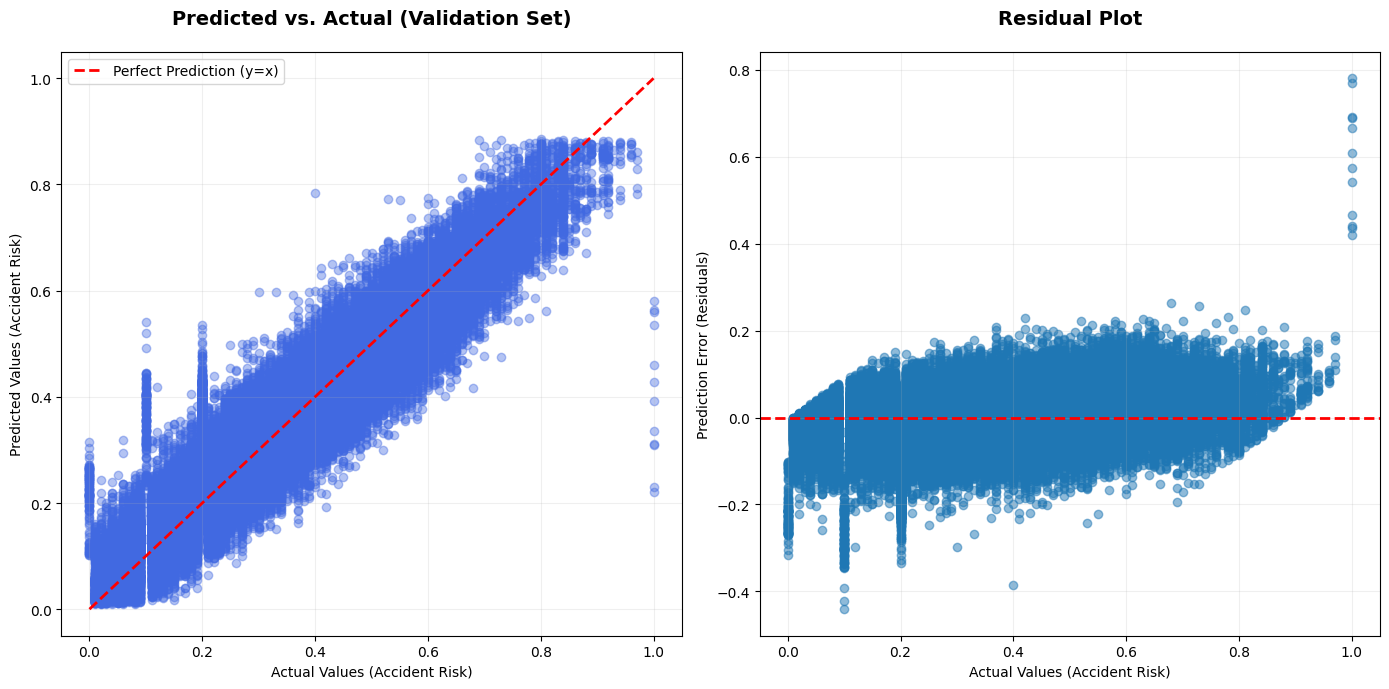

In [33]:
evaluate_model(model = model_ridge, X_train = df_train_new_prepared, 
               X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## Lasso

In [34]:
param_lasso = {
	"alpha": 0.0010245333143769598,
	"fit_intercept": False,
	"tol": 0.0024420855423496523,
	"max_iter": 2961,
	"selection": "cyclic",
	"warm_start": False,
	"positive": True,
	"random_state": 42
}

model_lasso = Lasso(**param_lasso)
model_lasso

Lasso(alpha=0.0010245333143769598, fit_intercept=False, max_iter=2961,
      positive=True, random_state=42, tol=0.0024420855423496523)

Model: Lasso
Root Mean Squared Error (RMSE): 0.0584
--------------------------------------------------------------------------------


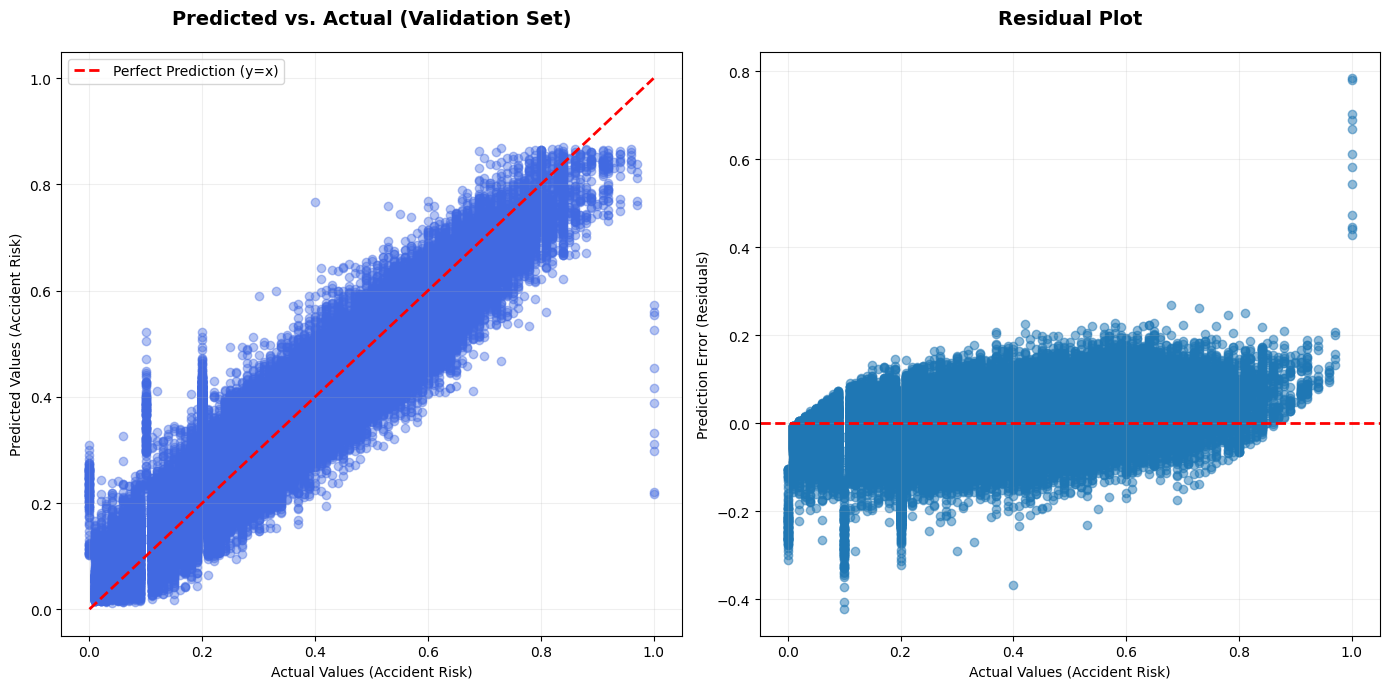

In [35]:
evaluate_model(model = model_lasso, X_train = df_train_new_prepared, 
               X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## CatBoostRegressor

In [36]:
param_cb = {
	"iterations": 1000,
	"learning_rate": 0.05,
	"depth": 7,
	"l2_leaf_reg": 3,
	"random_state": 42,
	"loss_function": "RMSE",
	"eval_metric": "RMSE",
	"verbose": 0,
	"allow_writing_files": False
}

model_cb = CatBoostRegressor(**param_cb)
model_cb

Model: CatBoostRegressor
Root Mean Squared Error (RMSE): 0.0563
--------------------------------------------------------------------------------


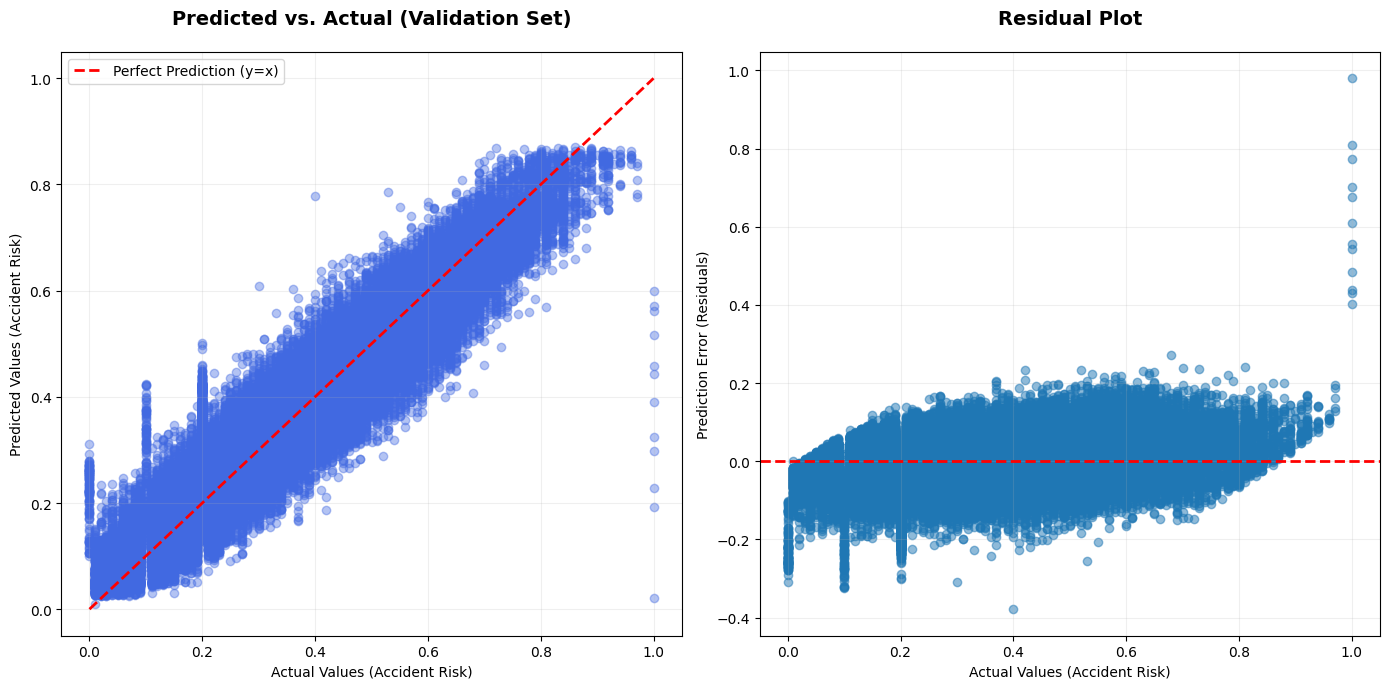

In [37]:
evaluate_model(model = model_cb, X_train = df_train_new_prepared, 
               X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## LGBMRegressor

In [38]:
param_lgbm = {
    "n_estimators": 1000,
    "learning_rate": 0.05,
    "max_depth": 7,
    "num_leaves": 31,
    "min_child_samples": 20,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "random_state": 42,
    "verbose": -1,
    "objective": "rmse",
    "metric": "rmse",
    "n_jobs" : -1
}

model_lgbm = LGBMRegressor(**param_lgbm)
model_lgbm

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=7,
              metric='rmse', n_estimators=1000, n_jobs=-1, objective='rmse',
              random_state=42, reg_alpha=0.1, reg_lambda=0.1, subsample=0.8,
              verbose=-1)

Model: LGBMRegressor
Root Mean Squared Error (RMSE): 0.0563
--------------------------------------------------------------------------------


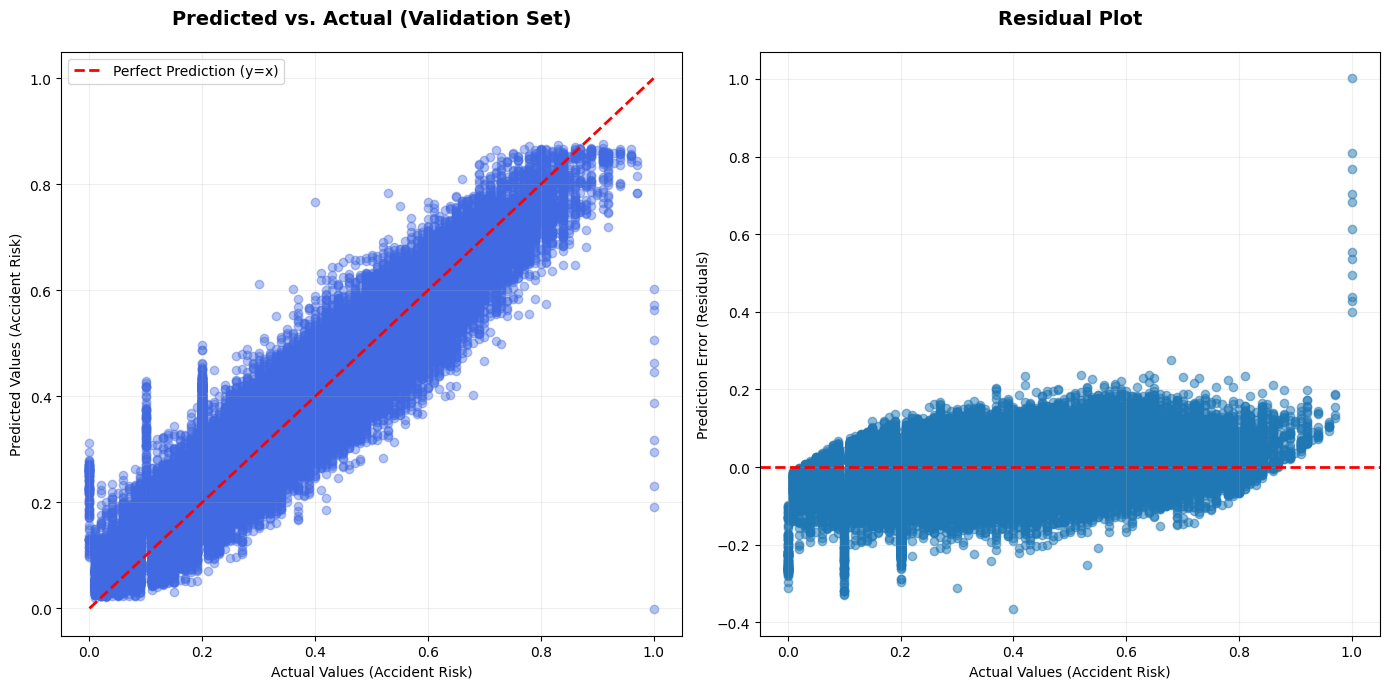

In [39]:
evaluate_model(model = model_lgbm, X_train = df_train_new_prepared, 
               X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## XGBRegressor

In [40]:
param_xgb = {
	"n_estimators": 1281,
	"learning_rate": 0.03646898761022518,
	"max_depth": 7,
	"min_child_weight": 16,
	"subsample": 0.8116239241720568,
	"colsample_bytree": 0.7419883074128462,
	"gamma": 0.005472397043739262,
	"reg_alpha": 0.002451008533497943,
	"reg_lambda": 0.0005841115820760172,
	"random_state": 42,
	"tree_method": "gpu_hist",      # GPU training
	"device": "cuda",
	"verbosity": 0,
	"n_jobs": -1,
	"objective": "reg:squarederror",
	"eval_metric": "rmse"
}

model_xgb = XGBRegressor(**param_xgb)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7419883074128462, device='cuda',
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0.005472397043739262,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03646898761022518,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=16, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1281, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

Model: XGBRegressor
Root Mean Squared Error (RMSE): 0.0563
--------------------------------------------------------------------------------


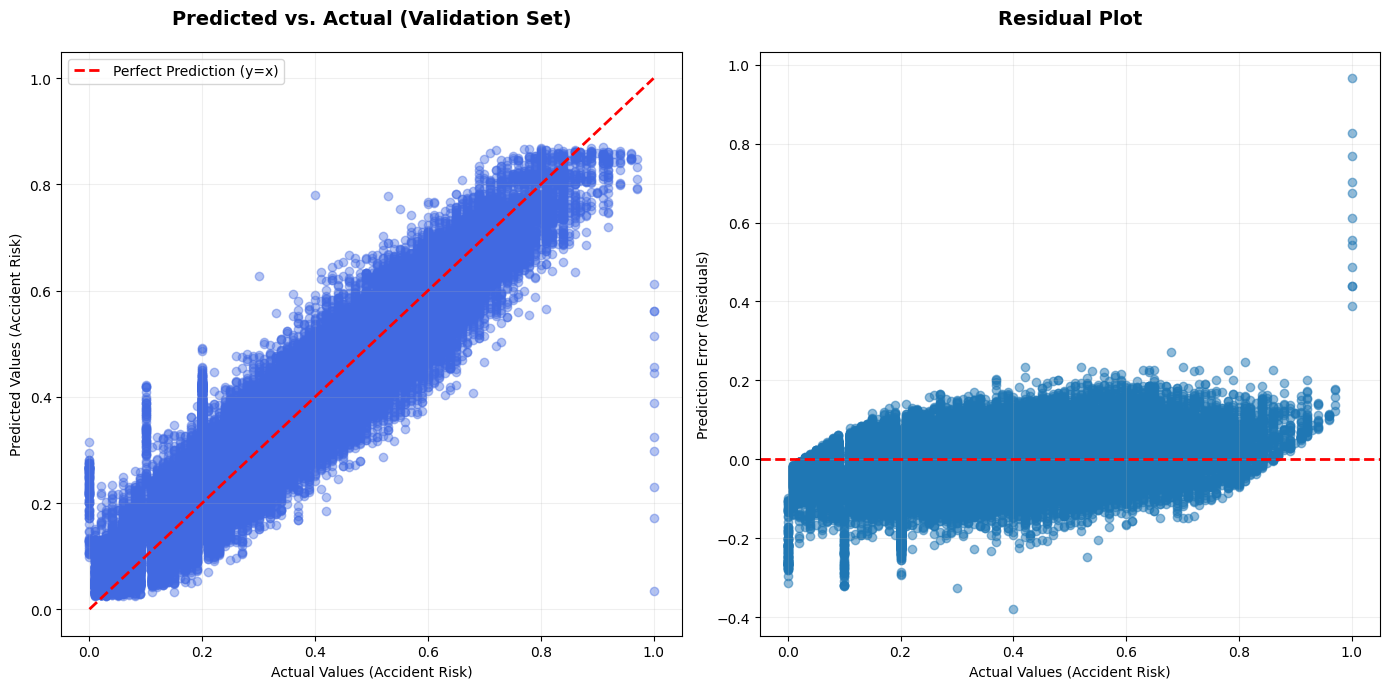

In [41]:
evaluate_model(model = model_xgb, X_train = df_train_new_prepared, 
               X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

## VotingRegressor

In [42]:
ests = [("cb", model_cb), ("xgb", model_xgb), ("lgbm", model_lgbm),
        ("ridge", model_ridge), ("lasso", model_lasso)]
preds = {name: m.predict(X_val_prepared) for name, m in ests}
corr = pd.DataFrame(preds).corr()
rmse_each = {name: np.sqrt(mean_squared_error(y_val, preds[name])) for name,_ in ests}
display(corr)
display(rmse_each)

A = np.column_stack([preds[name] for name,_ in ests])  # (n_val, n_models)

def obj_w(trial):
    w = np.array([trial.suggest_float(f"w_{i}", 0.0, 5.0) for i in range(A.shape[1])])
    if w.sum() == 0: return 1e9
    y_hat = A.dot(w / w.sum())
    return np.sqrt(mean_squared_error(y_val, y_hat))

study_w = optuna.create_study(direction="minimize")
study_w.optimize(obj_w, n_trials=3000, show_progress_bar=True)
w = np.array([study_w.best_params[f"w_{i}"] for i in range(A.shape[1])])
weights = (w / w.sum()).tolist()
print("Best weights:", weights)

cb       xgb      lgbm     ridge     lasso
cb     1.000000  0.999756  0.999739  0.996203  0.995762
xgb    0.999756  1.000000  0.999752  0.995954  0.995511
lgbm   0.999739  0.999752  1.000000  0.995952  0.995508
ridge  0.996203  0.995954  0.995952  1.000000  0.999575
lasso  0.995762  0.995511  0.995508  0.999575  1.000000

{'cb': 0.05629645915391566,
 'xgb': 0.05628382663853948,
 'lgbm': 0.05634321866739545,
 'ridge': 0.058114419055193677,
 'lasso': 0.05839660709480796}

  0%|          | 0/3000 [00:00<?, ?it/s]

Best weights: [0.44041118772711174, 0.5307166076458242, 0.02880776619527179, 2.9947257891632023e-05, 3.4491173900755164e-05]


In [43]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
voting_reg = VotingRegressor(estimators=[
    ("cb", model_cb),
    ("xgb", model_xgb),
    ("lgbm", model_lgbm),
    ("ridge", model_ridge),
    ("lasso", model_lasso)
], n_jobs=1, weights=weights)

cv_scores = cross_val_score(
    voting_reg,
    X=df_train_new_prepared,
    y=df_train_label_new,
    cv=kfold,
    scoring="neg_root_mean_squared_error",
    n_jobs=1
)

mean_score = -cv_scores.mean()
std_score = cv_scores.std()

print(f"Cross-validated RMSE (mean ± std): {mean_score:.4f} ± {std_score:.4f}")

Cross-validated RMSE (mean ± std): 0.0561 ± 0.0002


Model: VotingRegressor
Root Mean Squared Error (RMSE): 0.0563
--------------------------------------------------------------------------------


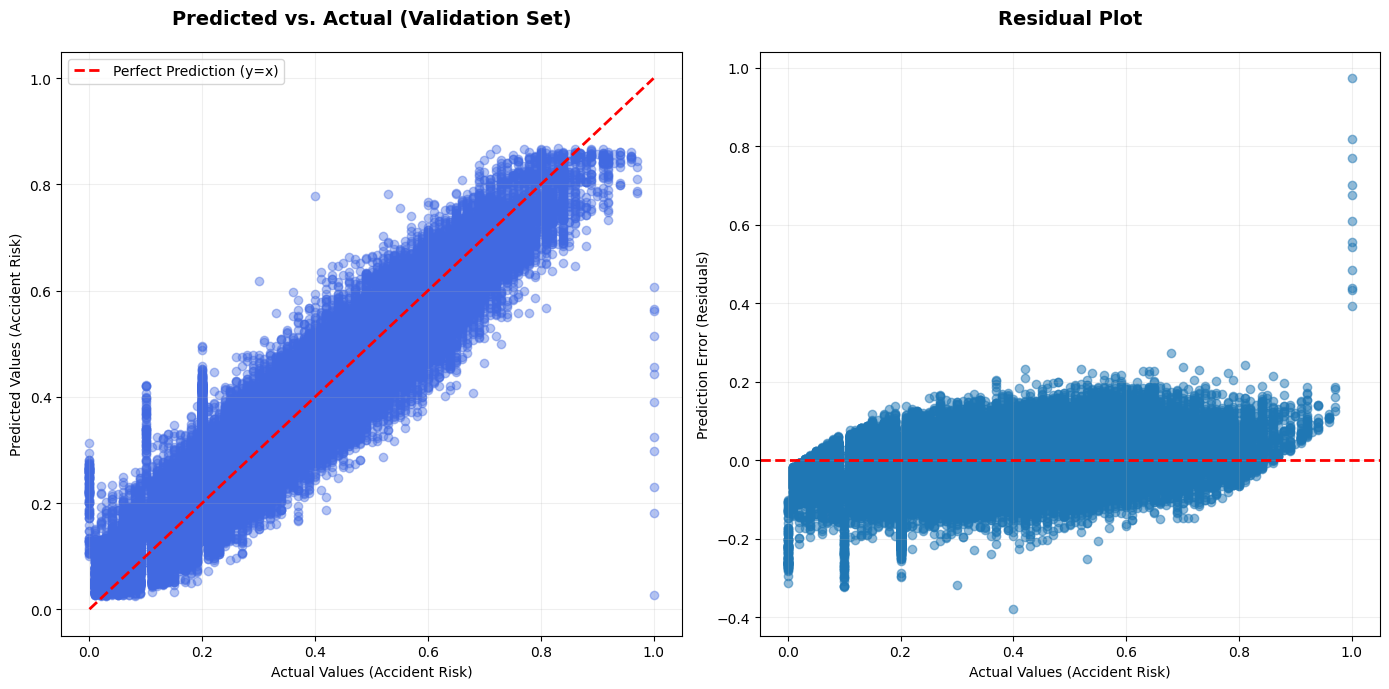

In [44]:
evaluate_model(model = voting_reg, X_train = df_train_new_prepared, 
               X_val = X_val_prepared , y_train = df_train_label_new, y_val=y_val, show_shap_plot = False)

**Model Performance**

* **RMSE = 0.0563** → very low compared to the target scale (accident_risk ∈ [0,1]).
* This indicates that the VotingRegressor predicts quite well, with an average error of only about 6%.

**Predicted vs. Actual (Left Plot)**

* Data points are **closely aligned with the red y=x line** (perfect prediction).
* There is some **underestimation** (predicted values lower than actual) when actual > 0.7.
* In the low-value range (<0.2), predictions are more scattered but still centered around y=x.
* Overall, the model captures the relationship between actual and predicted values very well.

**Residual Plot (Right Plot)**

* Residuals are distributed around **0**, meaning the model is not systematically biased.
* Slightly larger errors occur in:

  * The **high actual range (>0.7)** → the model tends to **underpredict**.
  * The **low actual range (~0.0–0.1)** → a few outliers with large negative errors (overprediction).
* However, most residuals are concentrated within **[-0.2, +0.2]**, showing stable predictions.

**Overall Conclusion**

* The VotingRegressor delivers **strong performance** with low RMSE.
* **Strengths**:

  * Predictions align closely with actual values, minimal bias.
  * The ensemble approach combining multiple base models (CatBoost, XGB, LGBM, Ridge, Lasso) is effective.
* **Areas for improvement**:

  * For **high accident_risk values**, the model could be enhanced to reduce underprediction.
  * Consider **increasing the weights of CatBoost/XGB** (nonlinear models) in the ensemble.
  * Alternatively, explore **StackingRegressor** instead of Voting for more adaptive weight learning.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px;
    border: 2px solid #003366;
    padding: 10px;
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 5px;
        font-size: 28px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>

In [45]:
df_test_prepared = preprocessor.transform(df_test)
y_pred_test = voting_reg.predict(df_test_prepared)

submission_df = pd.DataFrame({
    "id": list_test_id,
    "accident_risk": y_pred_test
})

submission_df.to_csv("submission.csv", index=False)
print("\nSubmission file saved!")
submission_df.head(10)


Submission file saved!


id  accident_risk
0  517754       0.292741
1  517755       0.124106
2  517756       0.188433
3  517757       0.316915
4  517758       0.398929
5  517759       0.457541
6  517760       0.261357
7  517761       0.199893
8  517762       0.371961
9  517763       0.322569

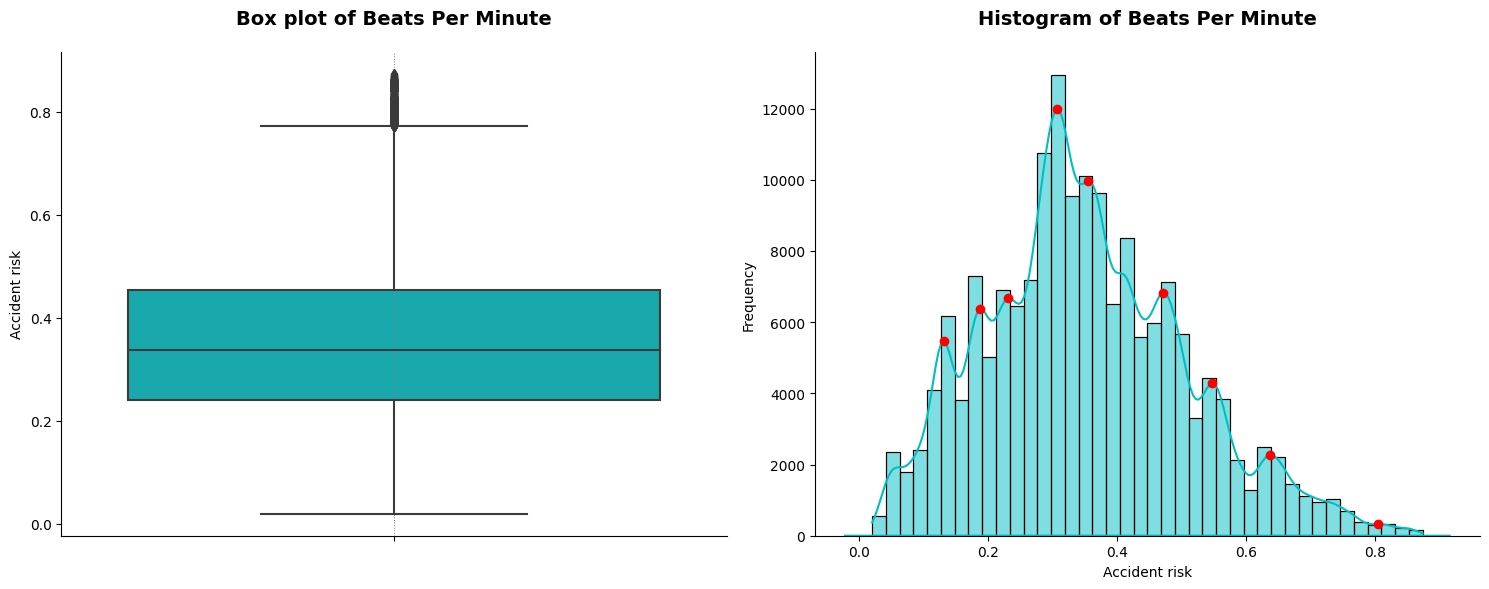

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=submission_df, y = "accident_risk", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of Beats Per Minute", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("Accident risk")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=submission_df, x = "accident_risk", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of Beats Per Minute", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("Accident risk")
ax[1].set_ylabel("Frequency")
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(submission_df["accident_risk"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**Box Plot (Left)**

* The **median** is around **0.33–0.35**, consistent with the average observed in previous analyses.
* The **IQR (Interquartile Range)** spans from ~0.25 to ~0.45 → most data points are concentrated around the mid-risk level.
* There are some **outliers** above 0.75, even exceeding 0.9. These represent extremely high accident risk cases (critical to monitor).
* The distribution appears fairly balanced, without extreme skewness.

**Histogram (Right)**

* The distribution is **non-normal**, showing a slight **right skew**.
* The peak (mode) lies around **0.3**, aligned with the boxplot’s median.
* The highest frequency is ~13,000 observations in the 0.25–0.35 range.
* As risk increases above 0.5, frequency decreases gradually, but there is still a small cluster in the **0.7–0.9 range** → representing high-risk cases.

**Overall Conclusion**

* Most observations fall between **0.2–0.5**, representing mid-level accident risk.
* A smaller but **notable proportion** of outliers >0.75 indicates **extremely high accident risk**.
* This distribution highlights why models must effectively handle the **imbalance** between mid-risk and high-risk groups.

PermutationExplainer explainer: 3001it [02:23, 19.92it/s]                          


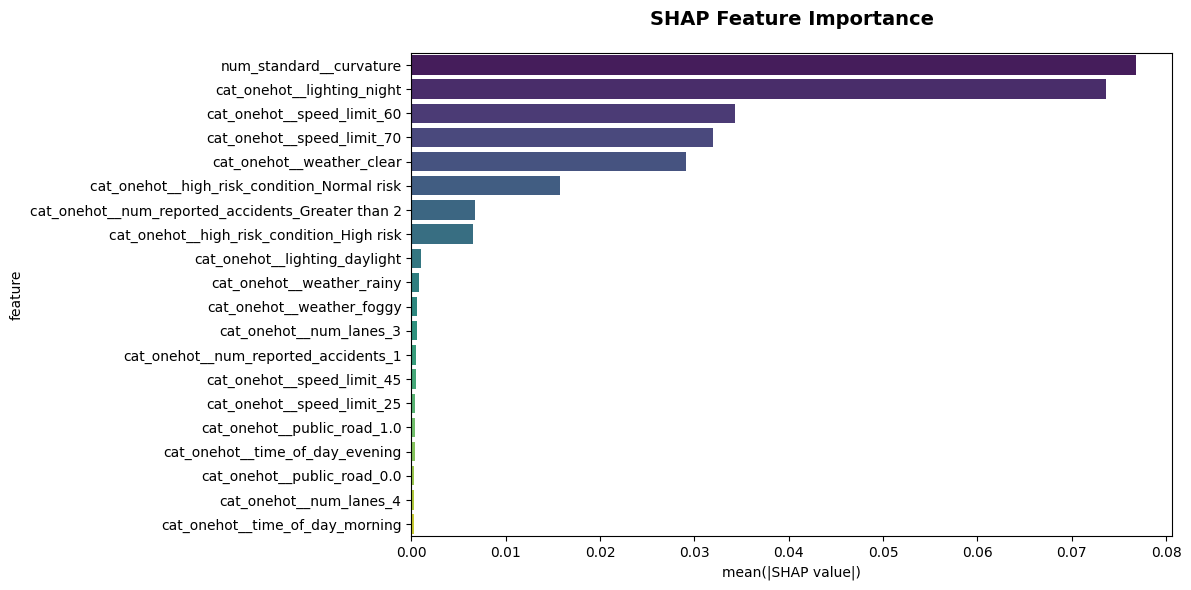

In [47]:
shap_plot(model=voting_reg.named_estimators_["cb"], X_test=df_test_prepared[:3000],
          list_feature=list_feature_prepared, type="bar")

PermutationExplainer explainer: 3001it [02:20, 19.78it/s]                          


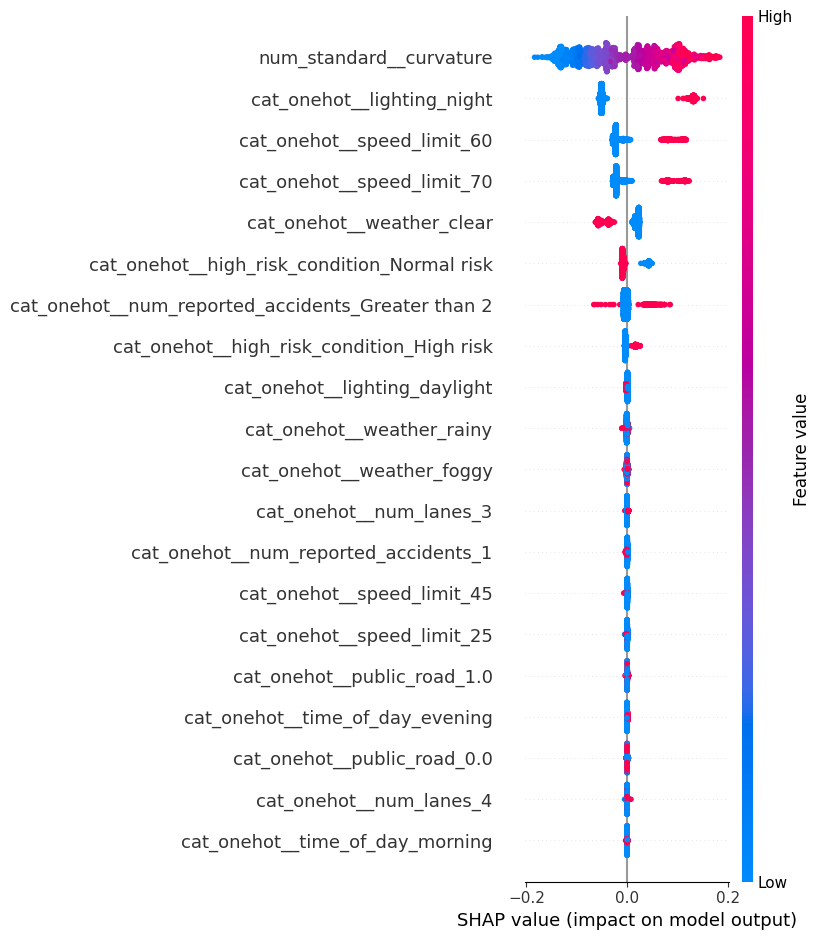

In [48]:
shap_plot(model=voting_reg.named_estimators_["cb"], X_test=df_test_prepared[:3000],
          list_feature=list_feature_prepared)

**SHAP Feature Importance (bar chart)**

* **Top features** with the strongest influence on the model:

  1. `num_standard__curvature` (road curvature)
  2. `cat_onehot__lighting_night` (nighttime lighting)
  3. `cat_onehot__speed_limit_60`
  4. `cat_onehot__speed_limit_70`
  5. `cat_onehot__weather_clear` (clear weather)
     → These are the **core factors** driving accident risk.

* Other important but lower-impact features:

  * `cat_onehot__high_risk_condition` (High risk / Normal risk)
  * `cat_onehot__num_reported_accidents_Greater than 2`
  * Bad weather (`rainy`, `foggy`)
  * Lower speed limits (`speed_limit_45`, `speed_limit_25`)
  * Number of lanes (`num_lanes_3`, `num_lanes_4`)

* Variables such as `time_of_day` and `public_road` show **minimal impact** (SHAP value ≈ 0).

**SHAP Summary Plot (violin scatter)**

* **`num_standard__curvature`**

  * **High values** (more curved roads) → positive SHAP, **higher accident risk**.
  * Straighter roads → small SHAP values, lower risk.

* **`lighting_night`**

  * Nighttime → positive SHAP, higher risk.
  * Daytime → SHAP near zero.

* **`speed_limit_60` & `speed_limit_70`**

  * When speed limits are set at 60–70 km/h → positive SHAP, higher risk.
  * Lower limits (25–45) → smaller or negative SHAP, lower risk.

* **`weather_clear`**

  * Clear weather → negative SHAP, **reduces accident risk**.
  * Rain or fog → positive SHAP, increases risk.

* **`high_risk_condition_High risk`**

  * High-risk conditions → strong positive SHAP, increase in accident risk.
  * Normal conditions → SHAP near zero.

* **`num_reported_accidents_Greater than 2`**

  * Locations with >2 previous accidents → positive SHAP, flagged as high-risk areas.

**Overall Insights**

* **Infrastructure & environmental factors** (curvature, lighting, weather, speed limits) dominate the model’s decisions — consistent with real-world intuition.
* **Historical accident records** (`num_reported_accidents`) strengthen the signal, helping the model identify “hot spots” for accidents.
* Features such as **time of day** and **road type** have little individual effect, but may matter more in interaction with other variables.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px;
    border: 2px solid #003366;
    padding: 10px;
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 5px;
        font-size: 28px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>


**Business Insights (SHAP Analysis)**

* **Sharp curves** → strongly increase accident risk → need warning signs, guardrails, rumble strips.
* **Nighttime** → higher risk → improve lighting, reflective markers, patrols + alcohol checks.
* **High speed limits (60–70)** → more dangerous → apply dynamic limits, speed cameras.
* **Bad weather (rain, fog)** → raises risk → electronic warnings, weather-integrated sensors.
* **Accident hotspots (≥2 cases)** → prioritize infrastructure upgrades, additional signage.
* **High-risk conditions** → can be used for **real-time GPS/app alerts**.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #003366;
    padding: 10px;
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff);
    text-align: center;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
        font-weight: bold;
        margin-bottom: 5px;
        font-size: 28px;
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
